In [1]:
import find_biom
import pandas as pd
import os
import numpy as np
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import shap


In [2]:
PATH ='./COVID/'
UNIQUE_PATH ='./COVID_UNIQUE/'

In [3]:
group_dict = {0: 'neg_vs_posi', 1: 'neg_vs_posi_f_plus_posi', 2: 'neg_plus_posi_f_vs_posi', 3: 'neg_posi_vs_posi_f'}
group_dict_name = {'neg_vs_posi':0, 'neg_vs_posi_f_plus_posi':1, 'neg_plus_posi_f_vs_posi': 2, 'neg_vs_posi_f_vs_posi': 3}

In [4]:
#compute samples uniques molecules list 
unique_mol_list = find_biom.compute_unique_mol_list(PATH=PATH)
print(unique_mol_list)

['(2-Aziridinylethyl)amine' '1(2H)-Acenaphthylenone'
 '1(3H)-Isobenzofuranone' "1,1'-Biphenyl, 2-chloro-"
 "1,1'-Biphenyl, 4-chloro-"
 '1,1,3,3,5,5,7,7-Octamethyl-7-(2-methylpropoxy)tetrasiloxan-1-ol'
 '1,1,3,3-Tetramethyl-1,3-bis[(2Z)-pent-2-en-1-yloxy]disiloxane'
 '1,2,3,6,7,8,9,10,11,12-Decahydrobenzo[e]pyrene'
 '1,2,3-Trifluoro-4-trifluoromethylbenzene' '1,2-Benzenedicarboxylic acid'
 '1,2-Naphthalenedione' '1,2-Propanediol, 3-phenoxy-'
 '1,2-Propanediol, diacetate' '1,3,3-Trimethoxybutane'
 '1,3,5,7-Cyclooctatetraene'
 '1,3-Diisopropoxy-1,3-dimethyl-1,3-disilacyclobutane' '1,4-Dioxane'
 '1,4-Pentadiene'
 '1,4:7,10-Dimethanotetracene-5,12-dione, 1,4,7,10-tetrahydro-'
 '1,7-Octadiene' '1-Butanol' '1-Butanone, 1-(2-furanyl)-'
 '1-Butanone, 1-phenyl-' '1-Chloro-2,5-difluorobenzene' '1-Chloroundecane'
 '1-Decen-3-one' '1-Dodecanamine, N,N-dimethyl-' '1-Heptanol'
 '1-Hepten-3-one' '1-Heptene' '1-Hexanol' '1-Hexanol, 2-ethyl-'
 '1-Octanol' '1-Octen-3-ol' '1-Octen-3-one'
 '1-Oxo-3-phenyl-

In [ ]:
find_biom.merge_molecule_in_samples(unique_mol_list, PATH=PATH, PATH_RES=UNIQUE_PATH)
find_biom.write_cohort_feature(unique_mol_list, UNIQUE_PATH=UNIQUE_PATH, filename='./unique_res.csv')

In [7]:
mol_list, mol_data_list, labels = find_biom.group_by_labels_all_molecules(filename='./unique_res.csv')

C:\Users\Stan\AppData\Local\Temp\ipykernel_1420\912943241.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = [filtered_negatif.astype(np.float), filtered_positif_f.astype(np.float), filtered_positif.astype(np.float),
C:\Users\Stan\AppData\Local\Temp\ipykernel_1420\912943241.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fil

# Negatif vs (Positif Faible + Postif)

1
[array([5.86711179e+08, 4.95000023e+08, 1.16792621e+10, 4.03110483e+08,
       5.48867602e+08]), array([1.17923249e+10, 1.55671661e+10, 7.99338768e+09]), array([1.39144580e+10, 1.16325648e+10]), array([1.17923249e+10, 5.86711179e+08, 4.95000023e+08, 1.16792621e+10,
       4.03110483e+08, 1.55671661e+10, 7.99338768e+09, 5.48867602e+08]), array([1.17923249e+10, 1.39144580e+10, 1.16325648e+10, 1.55671661e+10,
       7.99338768e+09])]
0.02828012256827699


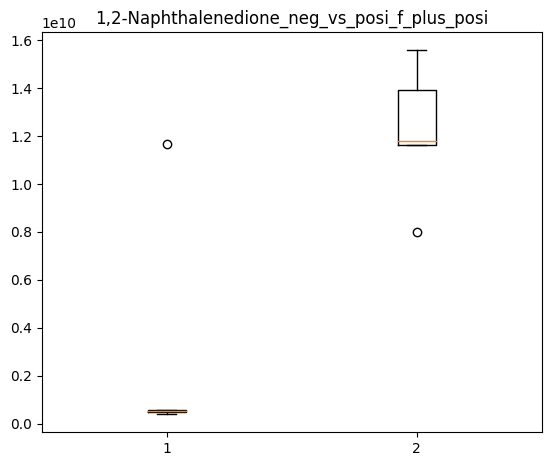

[array([3.01489257e+10, 1.80289886e+10]), array([3.44325563e+10, 3.13532762e+10, 4.23842950e+10]), array([4.62615293e+10]), array([3.44325563e+10, 3.01489257e+10, 3.13532762e+10, 4.23842950e+10,
       1.80289886e+10]), array([3.44325563e+10, 4.62615293e+10, 3.13532762e+10, 4.23842950e+10])]
0.06407750645105924


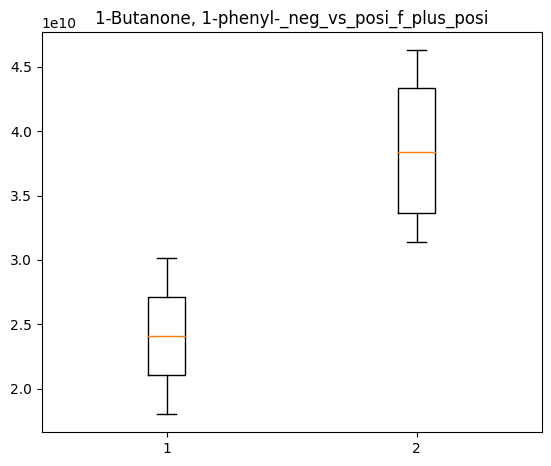

[array([5.28390989e+10, 5.29664797e+10, 9.57058797e+10]), array([1.1427e+11]), array([1.17901e+11]), array([5.28390989e+10, 5.29664797e+10, 9.57058797e+10, 1.14270000e+11]), array([1.17901e+11, 1.14270e+11])]
0.08326451666355043


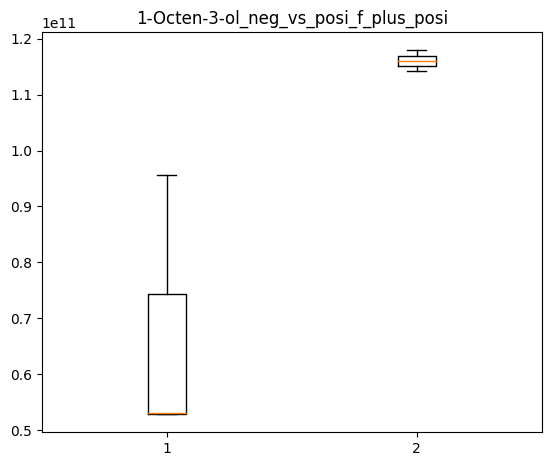

[array([4.33866258e+10, 4.51050139e+10, 5.88390791e+10, 4.65556319e+10,
       4.95435106e+10]), array([2.15017160e+10, 4.10416603e+10, 4.02372870e+10]), array([4.09587230e+10, 4.43005515e+10]), array([2.15017160e+10, 4.33866258e+10, 4.51050139e+10, 5.88390791e+10,
       4.65556319e+10, 4.10416603e+10, 4.02372870e+10, 4.95435106e+10]), array([2.15017160e+10, 4.09587230e+10, 4.43005515e+10, 4.10416603e+10,
       4.02372870e+10])]
0.01629360362102858


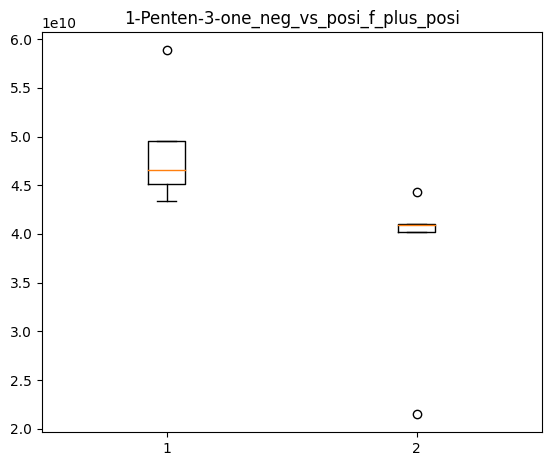

[array([6.32062476e+10, 4.38165613e+10, 5.82059691e+10, 6.47088108e+10]), array([6.09477762e+10, 6.68604846e+10, 6.46378317e+10]), array([8.94530043e+10, 9.25424500e+10]), array([6.09477762e+10, 6.32062476e+10, 4.38165613e+10, 5.82059691e+10,
       6.68604846e+10, 6.46378317e+10, 6.47088108e+10]), array([6.09477762e+10, 8.94530043e+10, 9.25424500e+10, 6.68604846e+10,
       6.46378317e+10])]
0.08641073297370006


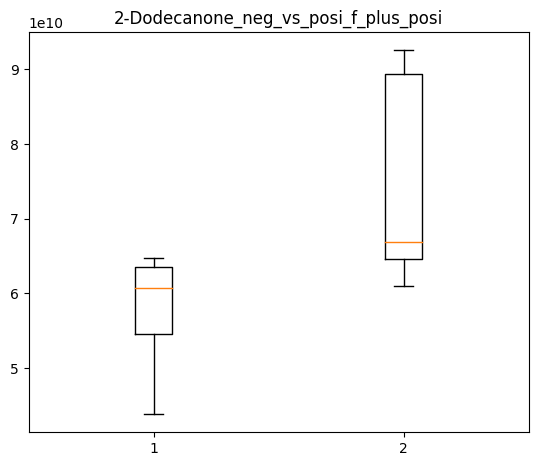

[array([4.88883450e+10, 5.12105936e+10, 4.60399022e+10, 4.51150093e+10,
       4.90280143e+10]), array([5.65576644e+10, 4.62346620e+10, 5.02559734e+10]), array([5.48106179e+10, 5.21079500e+10]), array([5.65576644e+10, 4.88883450e+10, 5.12105936e+10, 4.60399022e+10,
       4.51150093e+10, 4.62346620e+10, 5.02559734e+10, 4.90280143e+10]), array([5.65576644e+10, 5.48106179e+10, 5.21079500e+10, 4.62346620e+10,
       5.02559734e+10])]
0.07580017458236199


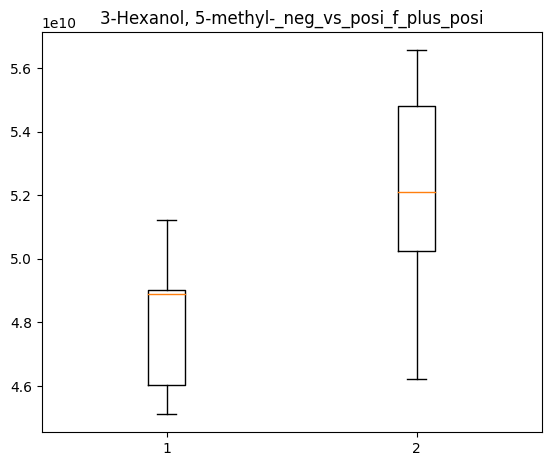

[array([7.12392514e+09, 7.55193584e+09, 6.23907898e+09, 3.10755880e+09,
       7.22127741e+09]), array([7.69351172e+09, 7.50759633e+09, 7.20778919e+09]), array([8.68453630e+09, 7.48861217e+09]), array([7.69351172e+09, 7.12392514e+09, 7.55193584e+09, 6.23907898e+09,
       3.10755880e+09, 7.50759633e+09, 7.20778919e+09, 7.22127741e+09]), array([7.69351172e+09, 8.68453630e+09, 7.48861217e+09, 7.50759633e+09,
       7.20778919e+09])]
0.07580017458236199


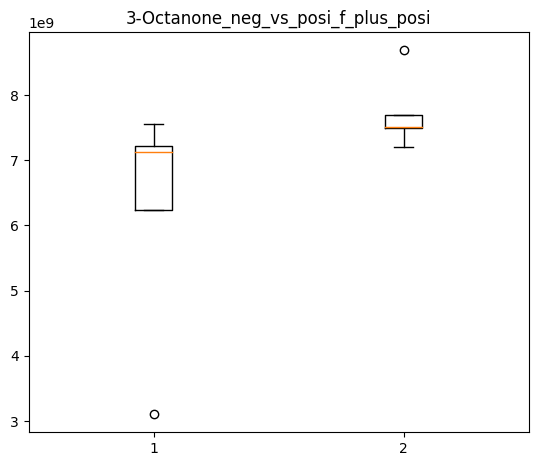

[array([1.92295e+12, 2.59613e+12, 1.97259e+12, 2.08635e+12]), array([1.84298e+12, 1.89338e+12, 1.76799e+12]), array([1.82405e+12, 1.99109e+12]), array([1.84298e+12, 1.92295e+12, 2.59613e+12, 1.97259e+12, 1.89338e+12,
       1.76799e+12, 2.08635e+12]), array([1.84298e+12, 1.82405e+12, 1.99109e+12, 1.89338e+12, 1.76799e+12])]
0.050043521248705126


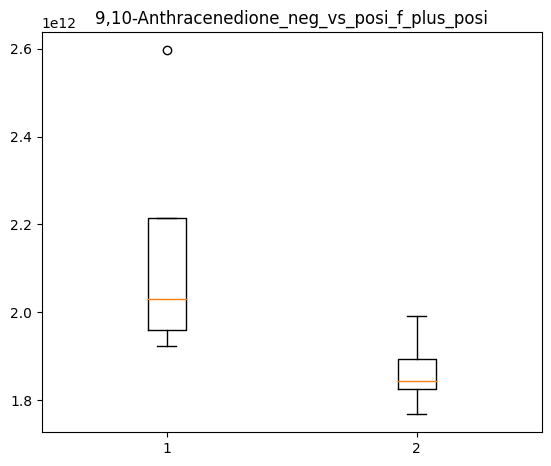

[array([3.33135785e+09, 1.22279711e+09, 2.80312563e+09, 1.35923760e+09]), array([3.19852956e+09, 3.50202030e+09, 4.14525217e+09]), array([1.70745868e+09, 3.92565976e+09]), array([3.19852956e+09, 3.33135785e+09, 1.22279711e+09, 2.80312563e+09,
       3.50202030e+09, 4.14525217e+09, 1.35923760e+09]), array([3.19852956e+09, 1.70745868e+09, 3.92565976e+09, 3.50202030e+09,
       4.14525217e+09])]
0.08641073297370006


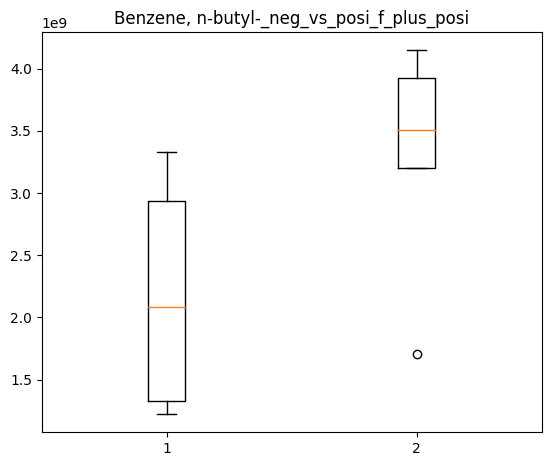

[array([2.85176320e+10, 4.45501561e+10, 2.84848374e+10, 2.51135010e+10]), array([2.75229397e+10, 2.37162735e+10, 2.25417402e+10]), array([2.06485624e+10]), array([2.75229397e+10, 2.85176320e+10, 4.45501561e+10, 2.84848374e+10,
       2.37162735e+10, 2.25417402e+10, 2.51135010e+10]), array([2.75229397e+10, 2.06485624e+10, 2.37162735e+10, 2.25417402e+10])]
0.04330814281079211


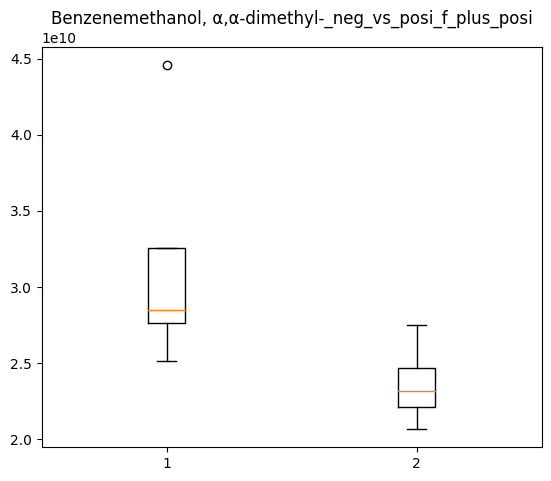

[array([5.99733e+12, 1.07217e+12, 2.71983e+12, 2.87129e+12, 3.68929e+12]), array([3.56703e+12, 6.40107e+12]), array([6.88189e+12, 6.02015e+12]), array([5.99733e+12, 1.07217e+12, 2.71983e+12, 2.87129e+12, 3.56703e+12,
       6.40107e+12, 3.68929e+12]), array([6.88189e+12, 6.02015e+12, 3.56703e+12, 6.40107e+12])]
0.050043521248705126


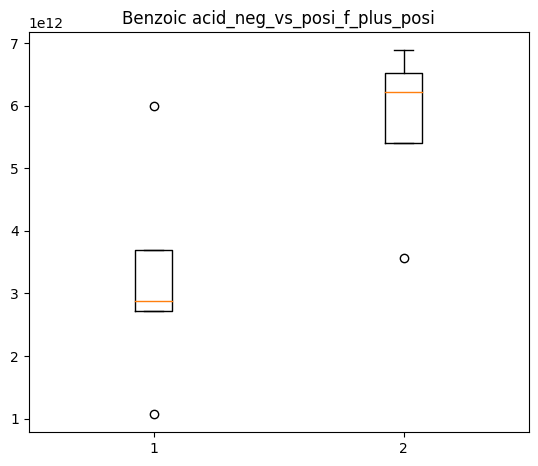

[array([2.04816e+11, 1.74327e+11]), array([4.41959726e+10, 1.47969000e+11]), array([5.80938919e+10]), array([4.41959726e+10, 2.04816000e+11, 1.74327000e+11, 1.47969000e+11]), array([4.41959726e+10, 5.80938919e+10, 1.47969000e+11])]
0.08326451666355043


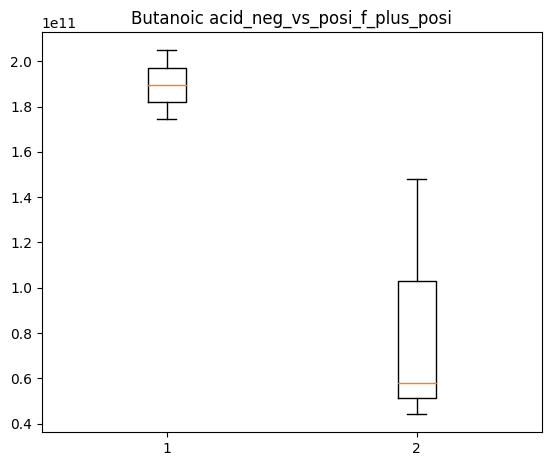

[array([1.14568000e+11, 1.19645000e+11, 1.40844000e+11, 9.97309453e+10,
       1.13472000e+11]), array([8.37703744e+10, 1.07416000e+11, 1.11361000e+11]), array([1.10189e+11, 1.08883e+11]), array([8.37703744e+10, 1.14568000e+11, 1.19645000e+11, 1.40844000e+11,
       9.97309453e+10, 1.07416000e+11, 1.11361000e+11, 1.13472000e+11]), array([8.37703744e+10, 1.10189000e+11, 1.08883000e+11, 1.07416000e+11,
       1.11361000e+11])]
0.07580017458236199


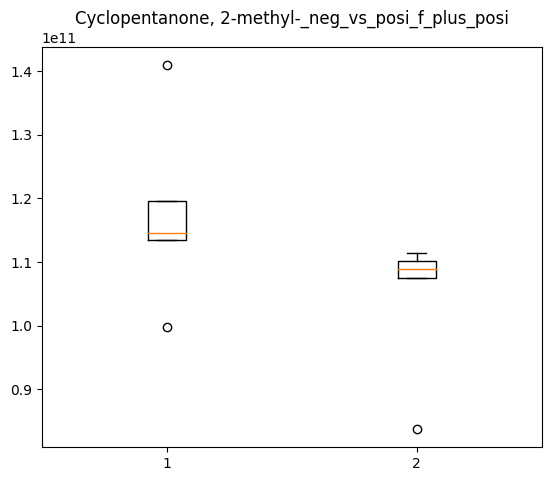

[array([3.28779e+11, 3.71926e+11, 5.11729e+11, 5.21963e+11, 4.24211e+11]), array([2.32093e+11, 3.02827e+11, 2.83914e+11]), array([4.13722e+11, 3.51453e+11]), array([2.32093e+11, 3.28779e+11, 3.71926e+11, 5.11729e+11, 5.21963e+11,
       3.02827e+11, 2.83914e+11, 4.24211e+11]), array([2.32093e+11, 4.13722e+11, 3.51453e+11, 3.02827e+11, 2.83914e+11])]
0.04720176769014221


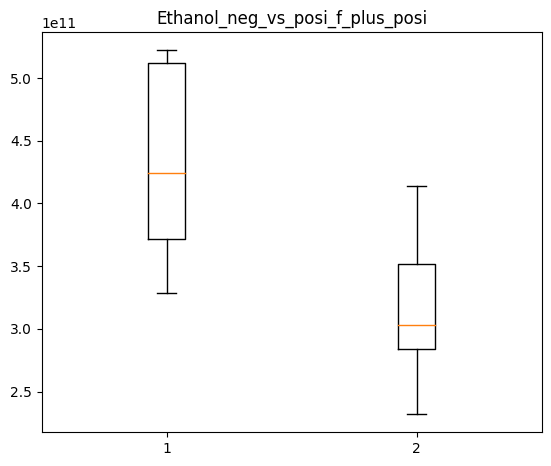

[array([1.73111335e+10, 2.37644111e+10, 1.84359530e+10]), array([2.48472569e+10]), array([2.54770163e+10]), array([1.73111335e+10, 2.37644111e+10, 1.84359530e+10, 2.48472569e+10]), array([2.54770163e+10, 2.48472569e+10])]
0.08326451666355043


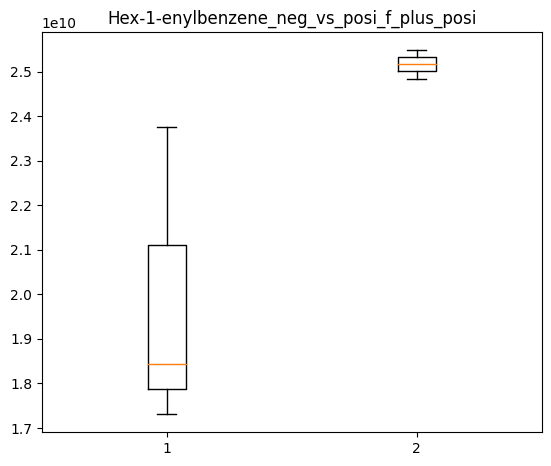

[array([3.57055406e+10, 3.78954124e+10, 3.64483700e+10, 1.62607732e+10,
       4.28167729e+10]), array([3.82136247e+10, 3.95867298e+10, 3.85576630e+10]), array([4.69052704e+10, 4.09932710e+10]), array([3.82136247e+10, 3.57055406e+10, 3.78954124e+10, 3.64483700e+10,
       1.62607732e+10, 3.95867298e+10, 3.85576630e+10, 4.28167729e+10]), array([3.82136247e+10, 4.69052704e+10, 4.09932710e+10, 3.95867298e+10,
       3.85576630e+10])]
0.07580017458236199


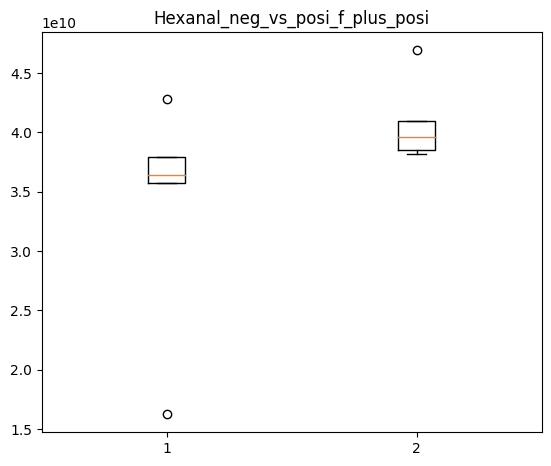

[array([2.57070342e+10, 3.53000196e+10, 4.64474296e+10, 2.80515314e+10]), array([2.36468465e+10, 2.50342047e+10]), array([1.89505593e+10, 2.59486222e+10]), array([2.36468465e+10, 2.57070342e+10, 3.53000196e+10, 4.64474296e+10,
       2.50342047e+10, 2.80515314e+10]), array([2.36468465e+10, 1.89505593e+10, 2.59486222e+10, 2.50342047e+10])]
0.04330814281079211


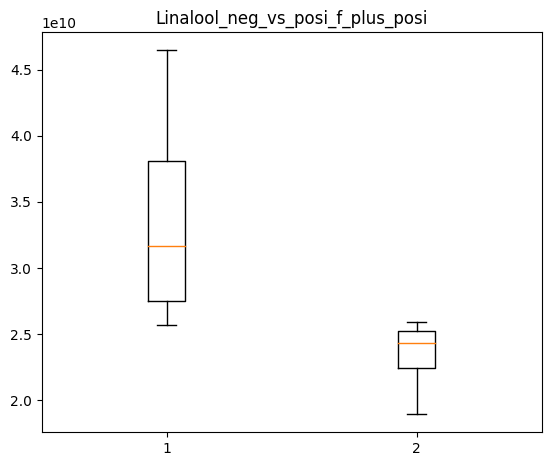

[array([4.73016e+11, 2.13674e+12, 1.07974e+13, 5.58340e+12]), array([6.59804e+11, 5.03867e+11, 4.65928e+11]), array([3.68821e+11, 1.29047e+12]), array([6.59804e+11, 4.73016e+11, 2.13674e+12, 1.07974e+13, 5.03867e+11,
       4.65928e+11, 5.58340e+12]), array([6.59804e+11, 3.68821e+11, 1.29047e+12, 5.03867e+11, 4.65928e+11])]
0.08641073297370006


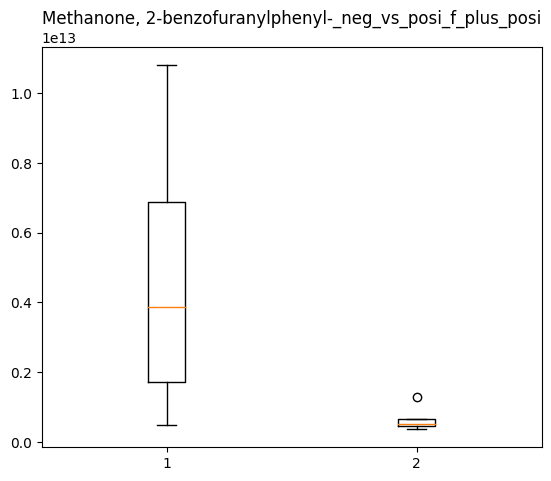

[array([7.39443750e+09, 4.80752399e+09, 1.92904754e+10]), array([1.79178562e+09, 1.13470755e+09]), array([], dtype=float64), array([7.39443750e+09, 4.80752399e+09, 1.79178562e+09, 1.13470755e+09,
       1.92904754e+10]), array([1.79178562e+09, 1.13470755e+09])]
0.08326451666355043


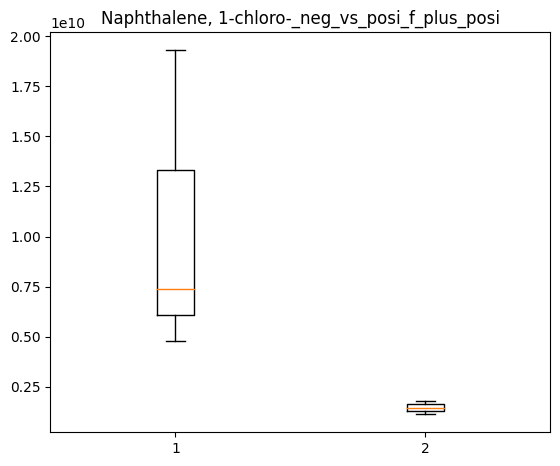

[array([1.99589816e+10, 1.88718910e+10, 2.91960454e+09, 1.91399522e+10,
       1.57317518e+10]), array([5.98222983e+09, 1.48433376e+10, 2.86428460e+09]), array([7.21662557e+08, 4.82072266e+09]), array([5.98222983e+09, 1.99589816e+10, 1.88718910e+10, 2.91960454e+09,
       1.91399522e+10, 1.48433376e+10, 2.86428460e+09, 1.57317518e+10]), array([5.98222983e+09, 7.21662557e+08, 4.82072266e+09, 1.48433376e+10,
       2.86428460e+09])]
0.04720176769014221


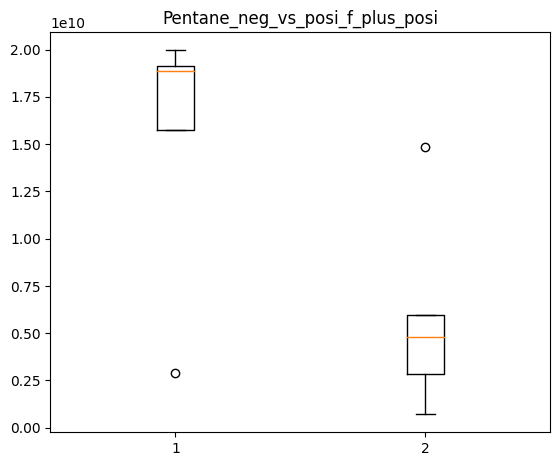

[array([2.21938483e+09, 2.85737101e+09, 2.34254410e+09]), array([2.07663552e+09, 2.08536438e+09]), array([], dtype=float64), array([2.21938483e+09, 2.85737101e+09, 2.07663552e+09, 2.08536438e+09,
       2.34254410e+09]), array([2.07663552e+09, 2.08536438e+09])]
0.08326451666355043


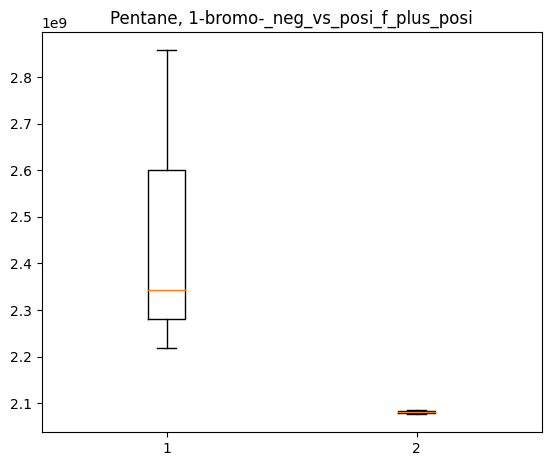

[array([3.05505660e+10, 3.03400378e+10, 3.35098892e+10, 4.40272709e+10,
       3.34582213e+10]), array([1.85888967e+10, 2.44726899e+10, 2.69809854e+10]), array([3.69249496e+10, 2.85302315e+10]), array([1.85888967e+10, 3.05505660e+10, 3.03400378e+10, 3.35098892e+10,
       4.40272709e+10, 2.44726899e+10, 2.69809854e+10, 3.34582213e+10]), array([1.85888967e+10, 3.69249496e+10, 2.85302315e+10, 2.44726899e+10,
       2.69809854e+10])]
0.07580017458236199


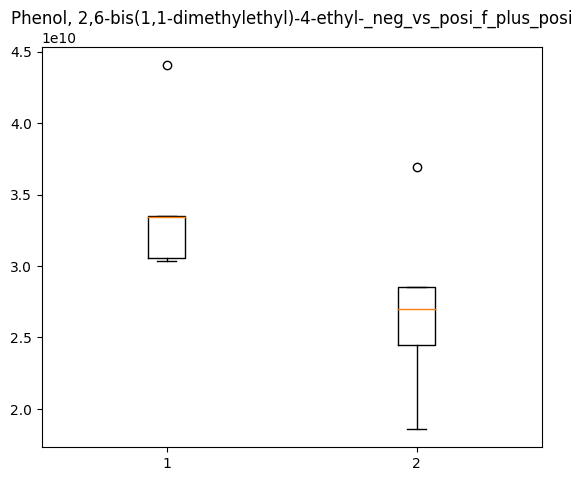

[array([1.91817e+11, 1.77596e+11, 2.12323e+11]), array([1.34281000e+11, 1.69573000e+11, 6.18350428e+10]), array([], dtype=float64), array([1.34281000e+11, 1.91817000e+11, 1.77596000e+11, 1.69573000e+11,
       6.18350428e+10, 2.12323000e+11]), array([1.34281000e+11, 1.69573000e+11, 6.18350428e+10])]
0.049534613435626915


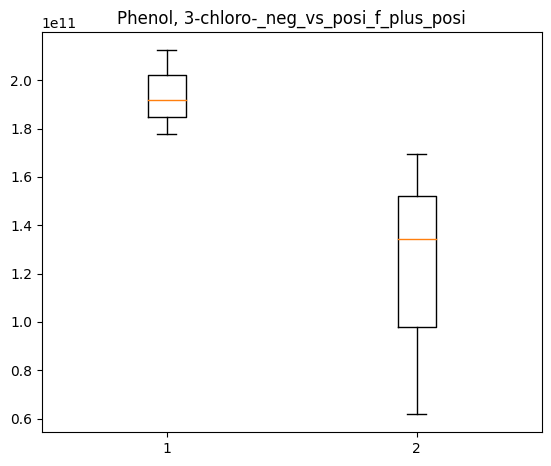

[array([4.21454827e+10, 4.42663384e+10]), array([8.9825697e+09]), array([2.20969167e+10, 1.69626654e+10]), array([8.98256970e+09, 4.21454827e+10, 4.42663384e+10]), array([8.98256970e+09, 2.20969167e+10, 1.69626654e+10])]
0.08326451666355043


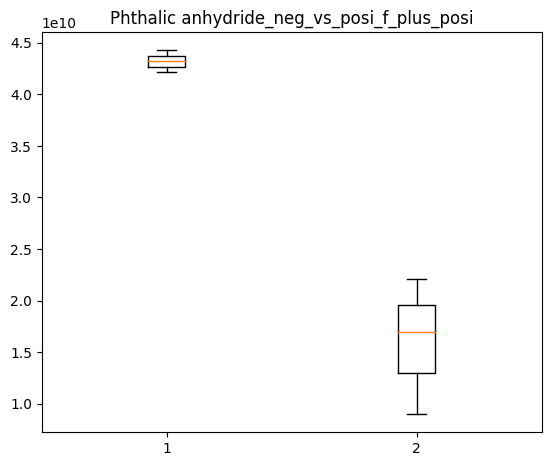

[array([7.49596932e+09, 6.08383491e+09]), array([5.87013273e+09]), array([5.74811359e+09, 4.58136014e+09]), array([7.49596932e+09, 5.87013273e+09, 6.08383491e+09]), array([5.74811359e+09, 4.58136014e+09, 5.87013273e+09])]
0.08326451666355043


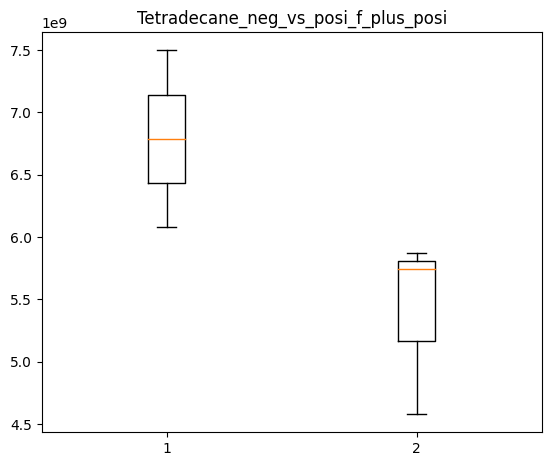

[array([4.43518831e+10, 9.18716338e+10, 5.89654892e+10, 3.10141803e+10]), array([2.92201596e+10, 3.28637954e+10]), array([2.8431195e+10]), array([4.43518831e+10, 9.18716338e+10, 5.89654892e+10, 2.92201596e+10,
       3.28637954e+10, 3.10141803e+10]), array([2.84311950e+10, 2.92201596e+10, 3.28637954e+10])]
0.0770998717435411


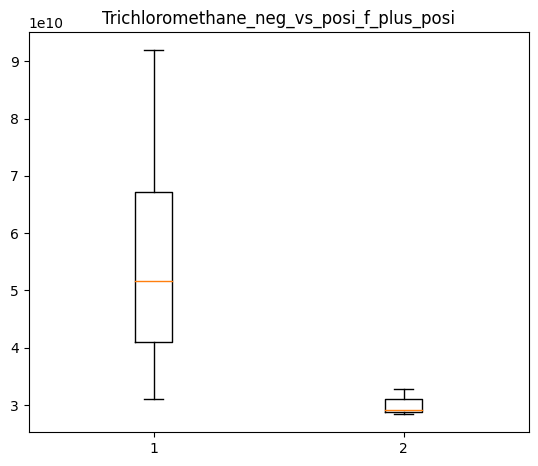

[array([1.72214e+13, 1.10805e+13, 1.36785e+13]), array([1.99079e+13, 1.93432e+13]), array([1.87776e+13, 1.60779e+13]), array([1.99079e+13, 1.72214e+13, 1.10805e+13, 1.93432e+13, 1.36785e+13]), array([1.99079e+13, 1.87776e+13, 1.60779e+13, 1.93432e+13])]
0.0770998717435411


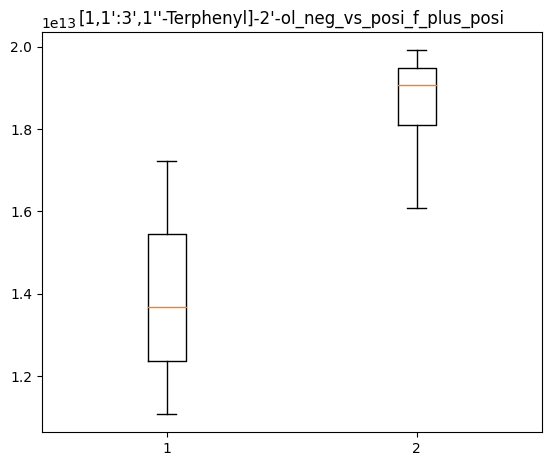

[array([2.16140000e+11, 2.42040000e+11, 2.28163000e+11, 4.79666945e+10,
       2.67985000e+11]), array([2.76563e+11, 2.76587e+11, 2.94120e+11]), array([2.52294e+11, 2.57851e+11]), array([2.76563000e+11, 2.16140000e+11, 2.42040000e+11, 2.28163000e+11,
       4.79666945e+10, 2.76587000e+11, 2.94120000e+11, 2.67985000e+11]), array([2.76563e+11, 2.52294e+11, 2.57851e+11, 2.76587e+11, 2.94120e+11])]
0.02828012256827699


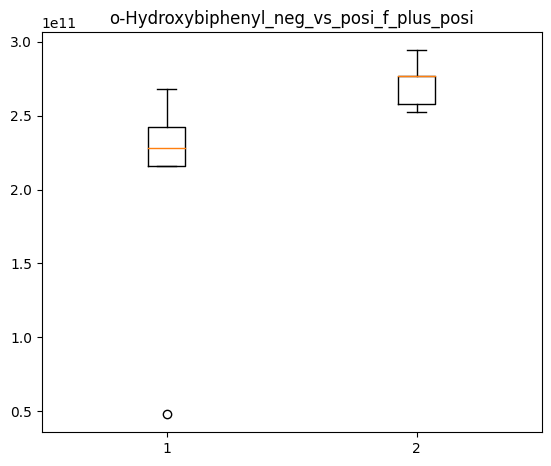

In [126]:
key = group_dict_name['neg_vs_posi_f_plus_posi']
print(key)
neg_vs_posi_f_plus_posi_mol = find_biom.filter_molecules_by_p_value(mol_list, mol_data_list, labels, mode=key, plot=True) 

1
[array([3.02098e+11]), array([], dtype=float64), array([], dtype=float64), array([3.02098e+11]), array([], dtype=float64)]
[array([2.06706117e+10, 1.26819395e+10, 6.21372823e+10, 9.07812488e+10,
       4.44112970e+10]), array([2.82177410e+10, 3.69737923e+10, 3.60936135e+10]), array([4.43777803e+10, 1.16262273e+10]), array([2.82177410e+10, 2.06706117e+10, 1.26819395e+10, 6.21372823e+10,
       9.07812488e+10, 3.69737923e+10, 3.60936135e+10, 4.44112970e+10]), array([2.82177410e+10, 4.43777803e+10, 1.16262273e+10, 3.69737923e+10,
       3.60936135e+10])]
[array([2.80652110e+10, 5.63817244e+10, 3.53974023e+10, 2.21643250e+10,
       6.17606007e+10]), array([5.18226833e+10, 4.89668044e+10, 4.21205369e+10]), array([6.20277332e+10, 4.56519314e+10]), array([5.18226833e+10, 2.80652110e+10, 5.63817244e+10, 3.53974023e+10,
       2.21643250e+10, 4.89668044e+10, 4.21205369e+10, 6.17606007e+10]), array([5.18226833e+10, 6.20277332e+10, 4.56519314e+10, 4.89668044e+10,
       4.21205369e+10])]
[arra

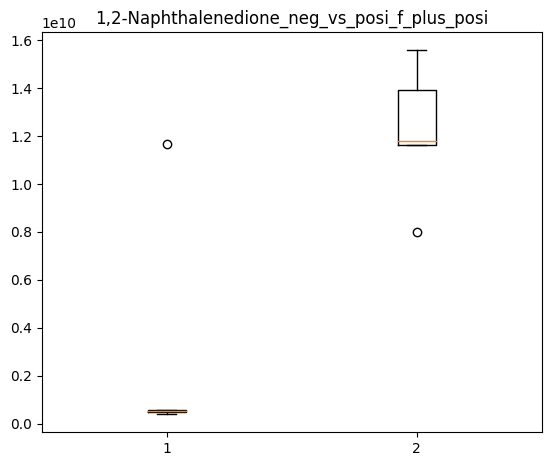

[array([1.07978e+11]), array([5.46327537e+10]), array([], dtype=float64), array([5.46327537e+10, 1.07978000e+11]), array([5.46327537e+10])]
[array([5.13269e+11, 5.20916e+11, 5.46791e+11, 5.31917e+11]), array([5.12770e+11, 5.25420e+11, 4.91251e+11]), array([5.34541e+11, 5.10509e+11]), array([5.12770e+11, 5.13269e+11, 5.20916e+11, 5.46791e+11, 5.25420e+11,
       4.91251e+11, 5.31917e+11]), array([5.12770e+11, 5.34541e+11, 5.10509e+11, 5.25420e+11, 4.91251e+11])]
[array([9.35041587e+10, 8.54475377e+10, 8.57295544e+10, 8.33440622e+10]), array([8.13632359e+10, 7.30554105e+10, 9.89978136e+10]), array([7.66235606e+10, 7.34057964e+10]), array([8.13632359e+10, 9.35041587e+10, 8.54475377e+10, 8.57295544e+10,
       7.30554105e+10, 9.89978136e+10, 8.33440622e+10]), array([8.13632359e+10, 7.66235606e+10, 7.34057964e+10, 7.30554105e+10,
       9.89978136e+10])]
[array([4.99934566e+10, 4.80501639e+10, 5.06282316e+10, 4.96123206e+10]), array([7.48415047e+10, 4.76098554e+10, 4.80925435e+10]), array([

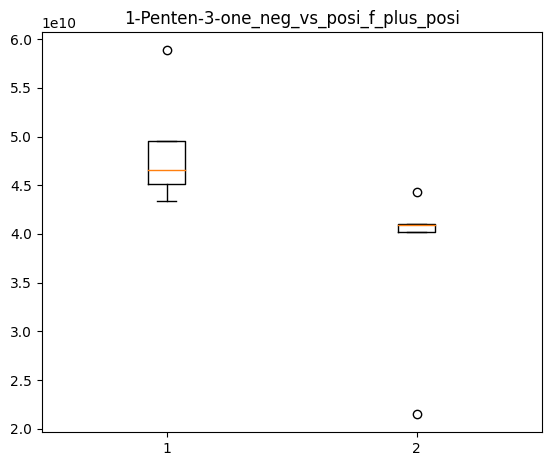

[array([1.17255000e+11, 1.07141000e+11, 8.76822589e+10, 1.11866000e+11]), array([9.81557442e+10, 1.08518000e+11, 1.11286000e+11]), array([1.10372e+11]), array([9.81557442e+10, 1.17255000e+11, 1.07141000e+11, 8.76822589e+10,
       1.08518000e+11, 1.11286000e+11, 1.11866000e+11]), array([9.81557442e+10, 1.10372000e+11, 1.08518000e+11, 1.11286000e+11])]
[array([1.74068857e+10, 1.24654605e+10, 1.71866048e+10, 1.01707031e+10,
       1.72465059e+10]), array([1.73243103e+10, 1.55620283e+10]), array([1.71966863e+10, 1.49724911e+10]), array([1.74068857e+10, 1.24654605e+10, 1.71866048e+10, 1.01707031e+10,
       1.73243103e+10, 1.55620283e+10, 1.72465059e+10]), array([1.71966863e+10, 1.49724911e+10, 1.73243103e+10, 1.55620283e+10])]
[array([6.20441163e+10, 6.70428343e+10, 6.62924282e+10, 3.91718614e+10,
       6.26083347e+10]), array([7.73012989e+10, 5.58319037e+10, 6.74209018e+10]), array([6.26534885e+10, 6.46881008e+10]), array([7.73012989e+10, 6.20441163e+10, 6.70428343e+10, 6.62924282e+10,


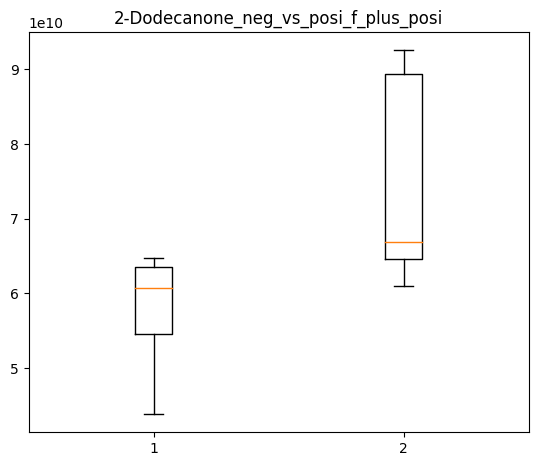

[array([], dtype=float64), array([], dtype=float64), array([8.21819148e+09]), array([], dtype=float64), array([8.21819148e+09])]
[array([4.38256333e+10]), array([4.85903005e+10]), array([], dtype=float64), array([4.38256333e+10, 4.85903005e+10]), array([4.85903005e+10])]
[array([2.14984e+11, 2.01321e+11, 2.26518e+11, 1.59412e+11, 2.07787e+11]), array([1.94537e+11, 2.05826e+11, 2.05398e+11]), array([2.79798e+11, 2.03485e+11]), array([1.94537e+11, 2.14984e+11, 2.01321e+11, 2.26518e+11, 1.59412e+11,
       2.05826e+11, 2.05398e+11, 2.07787e+11]), array([1.94537e+11, 2.79798e+11, 2.03485e+11, 2.05826e+11, 2.05398e+11])]
[array([2.37369398e+10, 1.64453833e+10, 1.95465468e+10]), array([2.24598444e+10, 1.90926208e+10]), array([2.08059735e+10, 2.26040958e+10]), array([2.24598444e+10, 2.37369398e+10, 1.64453833e+10, 1.90926208e+10,
       1.95465468e+10]), array([2.24598444e+10, 2.08059735e+10, 2.26040958e+10, 1.90926208e+10])]
[array([2.34984501e+10]), array([], dtype=float64), array([], dtype

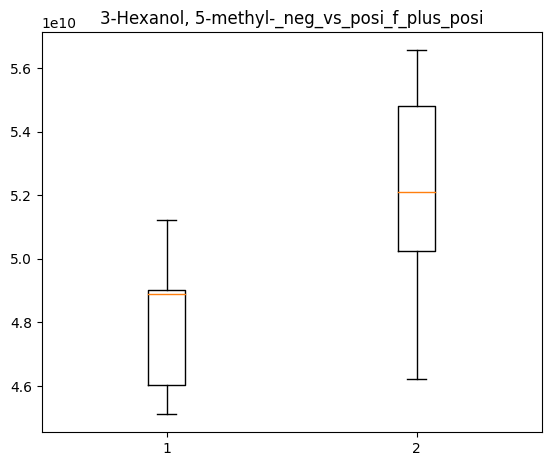

[array([8.63120672e+09, 6.91664155e+09, 8.76564308e+09, 4.00969012e+09,
       8.25643573e+09]), array([6.64538476e+09, 8.42219196e+09, 8.06703553e+09]), array([8.28650428e+09, 7.96312013e+09]), array([6.64538476e+09, 8.63120672e+09, 6.91664155e+09, 8.76564308e+09,
       4.00969012e+09, 8.42219196e+09, 8.06703553e+09, 8.25643573e+09]), array([6.64538476e+09, 8.28650428e+09, 7.96312013e+09, 8.42219196e+09,
       8.06703553e+09])]
[array([7.65849744e+08, 6.22367008e+08]), array([7.89091641e+09]), array([4.26288304e+08]), array([7.65849744e+08, 6.22367008e+08, 7.89091641e+09]), array([4.26288304e+08, 7.89091641e+09])]
[array([1.32841668e+09, 1.23026150e+09, 7.60093597e+08, 7.83614726e+08,
       1.00720265e+09]), array([9.57002641e+08, 9.58724635e+08, 1.08227563e+09]), array([1.16250341e+09, 1.03542173e+09]), array([9.57002641e+08, 1.32841668e+09, 1.23026150e+09, 7.60093597e+08,
       7.83614726e+08, 9.58724635e+08, 1.08227563e+09, 1.00720265e+09]), array([9.57002641e+08, 1.16250341e+0

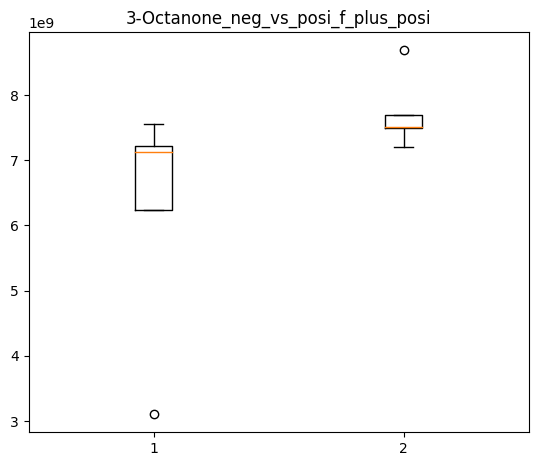

[array([6.24347063e+10, 7.09729565e+10, 6.08909024e+10]), array([6.52185145e+10, 5.43493023e+10, 5.43013815e+10]), array([6.88364933e+10, 5.76346107e+10]), array([6.52185145e+10, 6.24347063e+10, 7.09729565e+10, 5.43493023e+10,
       5.43013815e+10, 6.08909024e+10]), array([6.52185145e+10, 6.88364933e+10, 5.76346107e+10, 5.43493023e+10,
       5.43013815e+10])]
[array([], dtype=float64), array([2.82502617e+09]), array([], dtype=float64), array([2.82502617e+09]), array([2.82502617e+09])]
[array([2.27357e+11]), array([], dtype=float64), array([], dtype=float64), array([2.27357e+11]), array([], dtype=float64)]
[array([], dtype=float64), array([], dtype=float64), array([1.54562284e+09]), array([], dtype=float64), array([1.54562284e+09])]
[array([8.60849242e+08, 2.65015664e+09, 8.56195567e+08]), array([], dtype=float64), array([2.36118999e+09]), array([8.60849242e+08, 2.65015664e+09, 8.56195567e+08]), array([2.36118999e+09])]
[array([], dtype=float64), array([2.34145308e+10]), array([], dty

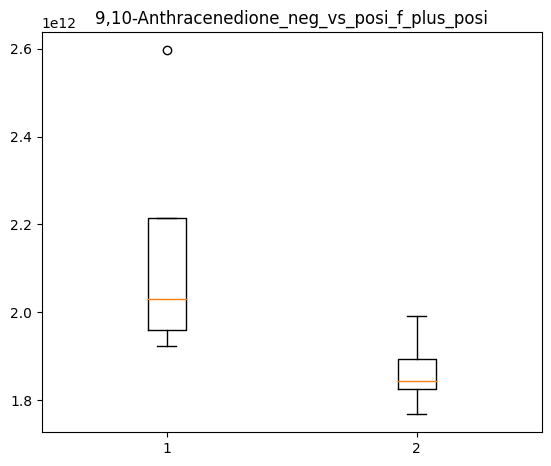

[array([2.26074e+12, 3.21113e+12, 9.71050e+11, 2.12388e+12]), array([1.85887e+12, 1.18855e+12, 2.59534e+12]), array([2.22387e+12, 3.18714e+12]), array([1.85887e+12, 2.26074e+12, 3.21113e+12, 9.71050e+11, 1.18855e+12,
       2.59534e+12, 2.12388e+12]), array([1.85887e+12, 2.22387e+12, 3.18714e+12, 1.18855e+12, 2.59534e+12])]
[array([8.94791146e+10, 2.44781000e+11, 5.71463000e+11, 1.66588000e+11,
       4.54965000e+11]), array([1.80587e+11, 2.19749e+11, 1.90552e+11]), array([2.57040e+11, 2.50043e+11]), array([1.80587000e+11, 8.94791146e+10, 2.44781000e+11, 5.71463000e+11,
       1.66588000e+11, 2.19749000e+11, 1.90552000e+11, 4.54965000e+11]), array([1.80587e+11, 2.57040e+11, 2.50043e+11, 2.19749e+11, 1.90552e+11])]
[array([1.35642e+12, 6.89145e+11]), array([1.17315e+12]), array([1.24637e+12]), array([1.35642e+12, 6.89145e+11, 1.17315e+12]), array([1.24637e+12, 1.17315e+12])]
[array([1.23153333e+10, 1.68486882e+10, 2.58272603e+10, 1.51939377e+10,
       1.48498776e+10]), array([1.4312839

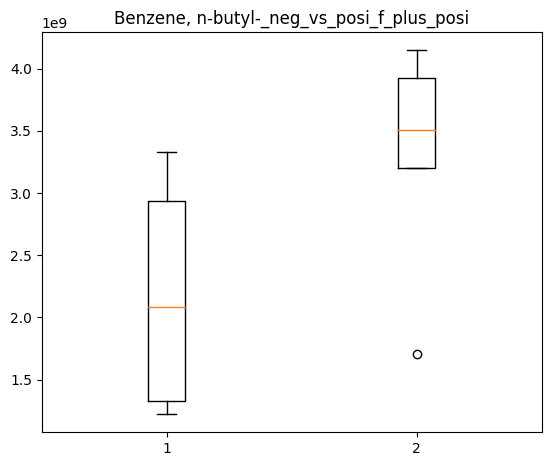

[array([1.34559026e+10, 4.01411760e+10, 1.44944776e+10, 5.25940423e+10,
       4.23962651e+10]), array([3.81753165e+10, 2.18012761e+10, 1.35304493e+10]), array([4.31385306e+10, 4.00838265e+10]), array([3.81753165e+10, 1.34559026e+10, 4.01411760e+10, 1.44944776e+10,
       5.25940423e+10, 2.18012761e+10, 1.35304493e+10, 4.23962651e+10]), array([3.81753165e+10, 4.31385306e+10, 4.00838265e+10, 2.18012761e+10,
       1.35304493e+10])]
[array([3.81565575e+09, 1.78240810e+09]), array([3.86879622e+09]), array([2.64091142e+09]), array([3.81565575e+09, 1.78240810e+09, 3.86879622e+09]), array([2.64091142e+09, 3.86879622e+09])]
[array([2.33885918e+09, 4.05907752e+09, 7.22237473e+09, 2.28206067e+09]), array([2.92918096e+09, 2.42882705e+09, 3.86308802e+09]), array([3.68909935e+09]), array([2.92918096e+09, 2.33885918e+09, 4.05907752e+09, 7.22237473e+09,
       2.28206067e+09, 2.42882705e+09, 3.86308802e+09]), array([2.92918096e+09, 3.68909935e+09, 2.42882705e+09, 3.86308802e+09])]
[array([3.32527840

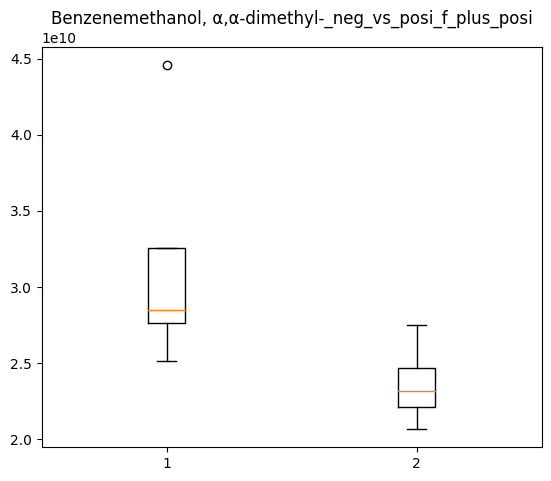

[array([1.19638224e+10]), array([], dtype=float64), array([], dtype=float64), array([1.19638224e+10]), array([], dtype=float64)]
[array([2.05052e+12, 4.23272e+11]), array([1.86657e+12, 3.91909e+12, 1.51981e+12]), array([1.41739e+11, 1.86915e+12]), array([1.86657e+12, 2.05052e+12, 4.23272e+11, 3.91909e+12, 1.51981e+12]), array([1.86657e+12, 1.41739e+11, 1.86915e+12, 3.91909e+12, 1.51981e+12])]
[array([2.30931818e+09, 2.84397923e+09, 8.29687422e+09, 5.07667177e+09]), array([8.13623314e+09, 3.78732659e+09]), array([3.85832918e+09]), array([2.30931818e+09, 2.84397923e+09, 8.29687422e+09, 8.13623314e+09,
       3.78732659e+09, 5.07667177e+09]), array([3.85832918e+09, 8.13623314e+09, 3.78732659e+09])]
[array([2.14045620e+09, 2.21711591e+09, 2.40556871e+09]), array([2.50369799e+09]), array([], dtype=float64), array([2.14045620e+09, 2.21711591e+09, 2.50369799e+09, 2.40556871e+09]), array([2.50369799e+09])]
[array([7.10861e+11, 6.80994e+11, 6.93379e+11, 3.75459e+11, 7.42619e+11]), array([7.5465

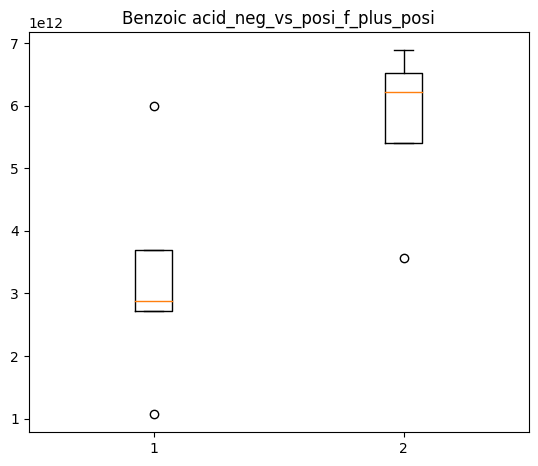

[array([7.28101979e+09, 1.46554788e+10, 1.20765116e+10, 2.64722445e+10]), array([1.8984031e+10]), array([8.60336779e+09]), array([7.28101979e+09, 1.46554788e+10, 1.20765116e+10, 1.89840310e+10,
       2.64722445e+10]), array([8.60336779e+09, 1.89840310e+10])]
[array([1.78583894e+10, 4.02487117e+10, 2.52549579e+10, 3.07629750e+10]), array([3.49695965e+10, 3.24116905e+10, 2.19237529e+10]), array([4.05315951e+10, 3.60776641e+10]), array([3.49695965e+10, 1.78583894e+10, 4.02487117e+10, 2.52549579e+10,
       3.24116905e+10, 2.19237529e+10, 3.07629750e+10]), array([3.49695965e+10, 4.05315951e+10, 3.60776641e+10, 3.24116905e+10,
       2.19237529e+10])]
[array([2.19628e+11, 2.24939e+11, 2.48348e+11, 1.15114e+11, 2.25848e+11]), array([2.34241e+11, 2.30855e+11, 2.36626e+11]), array([2.42668e+11, 2.29054e+11]), array([2.34241e+11, 2.19628e+11, 2.24939e+11, 2.48348e+11, 1.15114e+11,
       2.30855e+11, 2.36626e+11, 2.25848e+11]), array([2.34241e+11, 2.42668e+11, 2.29054e+11, 2.30855e+11, 2.36626

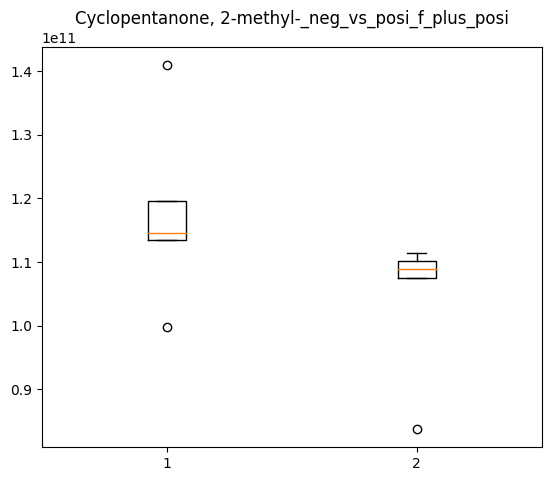

[array([2.04855e+11, 2.22828e+11, 4.75457e+11, 4.54159e+11, 3.54586e+11]), array([4.77054e+11, 4.59314e+11, 4.54366e+11]), array([4.12555e+11, 4.10803e+11]), array([4.77054e+11, 2.04855e+11, 2.22828e+11, 4.75457e+11, 4.54159e+11,
       4.59314e+11, 4.54366e+11, 3.54586e+11]), array([4.77054e+11, 4.12555e+11, 4.10803e+11, 4.59314e+11, 4.54366e+11])]
[array([2.29789000e+11, 8.09974008e+10, 9.11597672e+10, 6.51088691e+10,
       2.05784000e+11]), array([2.2014800e+11, 8.2993233e+10, 2.1736600e+11]), array([1.92526000e+11, 7.31086765e+10]), array([2.20148000e+11, 2.29789000e+11, 8.09974008e+10, 9.11597672e+10,
       6.51088691e+10, 8.29932330e+10, 2.17366000e+11, 2.05784000e+11]), array([2.20148000e+11, 1.92526000e+11, 7.31086765e+10, 8.29932330e+10,
       2.17366000e+11])]
[array([2.01485000e+11, 3.67230183e+10, 2.66058000e+11, 9.49805500e+10,
       2.44911072e+10]), array([2.69756000e+11, 2.59794304e+10, 7.21420490e+10]), array([3.05059910e+10, 3.63285917e+10]), array([2.69756000e+11

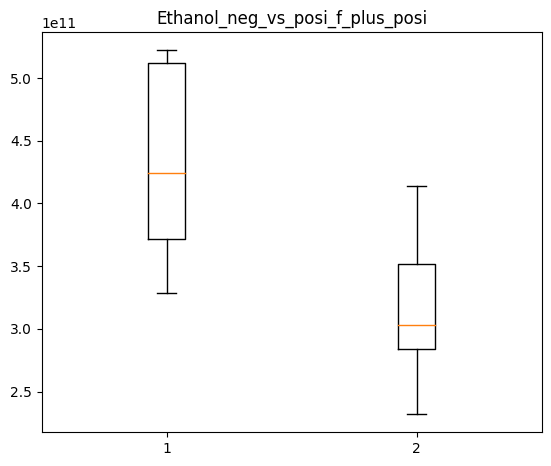

[array([9.05103099e+09, 9.32034945e+09, 6.38051146e+09, 8.59452382e+09]), array([1.02243999e+10, 8.90146427e+09]), array([9.04904071e+09]), array([1.02243999e+10, 9.05103099e+09, 9.32034945e+09, 6.38051146e+09,
       8.90146427e+09, 8.59452382e+09]), array([1.02243999e+10, 9.04904071e+09, 8.90146427e+09])]
[array([3.06705428e+09, 4.29184263e+09]), array([2.64445568e+09]), array([], dtype=float64), array([3.06705428e+09, 4.29184263e+09, 2.64445568e+09]), array([2.64445568e+09])]
[array([6.02672476e+10, 7.61200198e+10, 7.51372445e+10, 1.85084653e+10,
       6.72101458e+10]), array([7.29891239e+10, 7.49619576e+10, 6.55992545e+10]), array([6.72418800e+10, 4.64244935e+10]), array([7.29891239e+10, 6.02672476e+10, 7.61200198e+10, 7.51372445e+10,
       1.85084653e+10, 7.49619576e+10, 6.55992545e+10, 6.72101458e+10]), array([7.29891239e+10, 6.72418800e+10, 4.64244935e+10, 7.49619576e+10,
       6.55992545e+10])]
[array([1.91618629e+10, 1.71475854e+10, 1.52998756e+10, 4.83160577e+09,
       1.

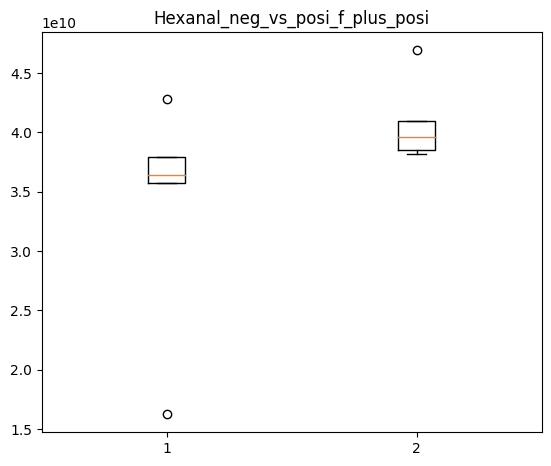

[array([1.59033e+11, 1.54235e+11, 1.77153e+11, 1.25307e+11, 1.72418e+11]), array([1.68660e+11, 1.67781e+11, 1.55210e+11]), array([1.71713e+11, 1.50914e+11]), array([1.68660e+11, 1.59033e+11, 1.54235e+11, 1.77153e+11, 1.25307e+11,
       1.67781e+11, 1.55210e+11, 1.72418e+11]), array([1.68660e+11, 1.71713e+11, 1.50914e+11, 1.67781e+11, 1.55210e+11])]
[array([], dtype=float64), array([], dtype=float64), array([2.77962747e+09]), array([], dtype=float64), array([2.77962747e+09])]
[array([1.99311412e+09, 1.50758625e+09]), array([1.43928289e+09, 1.27589563e+09]), array([2.07443016e+09]), array([1.43928289e+09, 1.99311412e+09, 1.27589563e+09, 1.50758625e+09]), array([1.43928289e+09, 2.07443016e+09, 1.27589563e+09])]
[array([2.76913453e+09, 3.16036361e+09, 3.30186604e+09, 2.26244920e+09,
       3.24345693e+09]), array([2.47451513e+09, 2.52140204e+09, 3.02711198e+09]), array([3.21809436e+09, 3.39345740e+09]), array([2.47451513e+09, 2.76913453e+09, 3.16036361e+09, 3.30186604e+09,
       2.262449

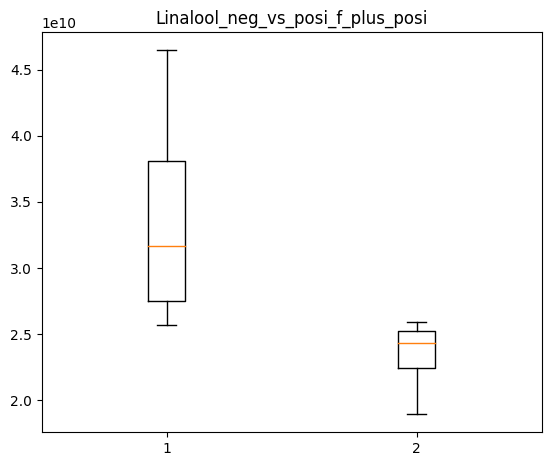

[array([7.05315832e+09, 5.68152533e+09, 7.52611062e+09, 5.50695539e+09,
       6.98161555e+09]), array([6.10029818e+09, 7.51427134e+09, 5.56896649e+09]), array([7.66537882e+09, 5.98199865e+09]), array([6.10029818e+09, 7.05315832e+09, 5.68152533e+09, 7.52611062e+09,
       5.50695539e+09, 7.51427134e+09, 5.56896649e+09, 6.98161555e+09]), array([6.10029818e+09, 7.66537882e+09, 5.98199865e+09, 7.51427134e+09,
       5.56896649e+09])]
[array([2.45329759e+09, 5.57801795e+08]), array([], dtype=float64), array([], dtype=float64), array([2.45329759e+09, 5.57801795e+08]), array([], dtype=float64)]
[array([1.19166656e+10, 2.34720974e+10, 9.25054165e+10, 8.93555176e+09,
       1.37714000e+11]), array([2.33262376e+10, 2.95256100e+10, 3.10830516e+10]), array([2.71415909e+10, 1.37002387e+10]), array([2.33262376e+10, 1.19166656e+10, 2.34720974e+10, 9.25054165e+10,
       8.93555176e+09, 2.95256100e+10, 3.10830516e+10, 1.37714000e+11]), array([2.33262376e+10, 2.71415909e+10, 1.37002387e+10, 2.95256100

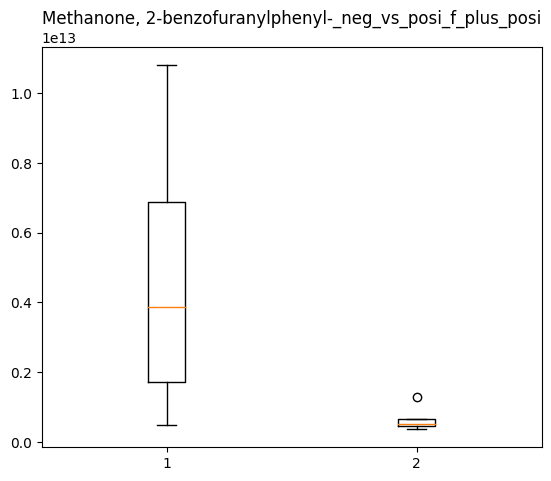

[array([3.19846e+11, 3.09480e+11, 3.37888e+11, 1.80685e+11, 3.54573e+11]), array([3.31905e+11, 3.70887e+11, 3.21820e+11]), array([4.10675e+11, 3.40486e+11]), array([3.31905e+11, 3.19846e+11, 3.09480e+11, 3.37888e+11, 1.80685e+11,
       3.70887e+11, 3.21820e+11, 3.54573e+11]), array([3.31905e+11, 4.10675e+11, 3.40486e+11, 3.70887e+11, 3.21820e+11])]
[array([], dtype=float64), array([], dtype=float64), array([1.41199822e+09]), array([], dtype=float64), array([1.41199822e+09])]
[array([9.84851877e+09, 8.37292739e+09, 1.05976244e+10, 6.66568288e+09,
       1.02558015e+10]), array([9.08809563e+09, 1.01282421e+10, 9.50448692e+09]), array([1.10448882e+10, 9.46446082e+09]), array([9.08809563e+09, 9.84851877e+09, 8.37292739e+09, 1.05976244e+10,
       6.66568288e+09, 1.01282421e+10, 9.50448692e+09, 1.02558015e+10]), array([9.08809563e+09, 1.10448882e+10, 9.46446082e+09, 1.01282421e+10,
       9.50448692e+09])]
[array([7.24711e+11, 7.99316e+11, 8.51369e+11, 4.95286e+11, 9.54957e+11]), array([3.

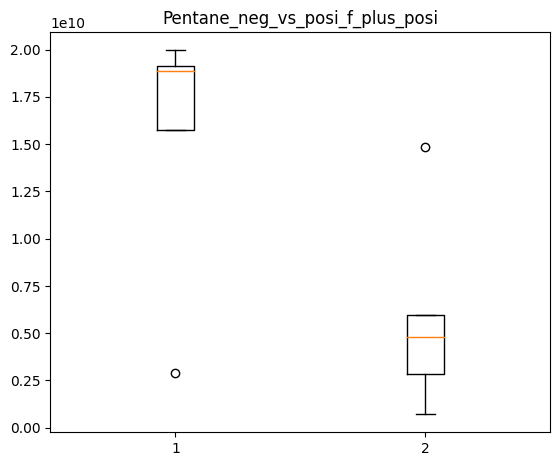

[array([2.21938483e+09, 2.85737101e+09, 2.34254410e+09]), array([2.07663552e+09, 2.08536438e+09]), array([], dtype=float64), array([2.21938483e+09, 2.85737101e+09, 2.07663552e+09, 2.08536438e+09,
       2.34254410e+09]), array([2.07663552e+09, 2.08536438e+09])]
[array([1.23878064e+10, 1.36571672e+10, 2.09001376e+10, 8.70911420e+09,
       1.51847083e+10]), array([1.14071545e+10, 1.56778383e+10, 1.27385147e+10]), array([1.22048584e+10, 1.40786184e+10]), array([1.14071545e+10, 1.23878064e+10, 1.36571672e+10, 2.09001376e+10,
       8.70911420e+09, 1.56778383e+10, 1.27385147e+10, 1.51847083e+10]), array([1.14071545e+10, 1.22048584e+10, 1.40786184e+10, 1.56778383e+10,
       1.27385147e+10])]
[array([], dtype=float64), array([9.61651441e+09]), array([], dtype=float64), array([9.61651441e+09]), array([9.61651441e+09])]
[array([5.15540800e+09, 3.32611659e+09, 2.43421929e+09, 3.23915042e+09]), array([1.25958495e+09, 4.34944830e+09]), array([4.25061569e+09, 5.33108939e+09]), array([1.25958495e+

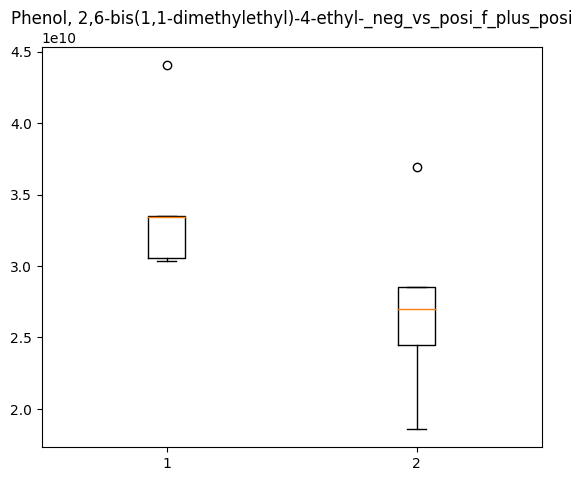

[array([4.66548886e+10]), array([], dtype=float64), array([], dtype=float64), array([4.66548886e+10]), array([], dtype=float64)]
[array([4.36026e+11, 4.86136e+11, 4.87033e+11, 1.59225e+11, 4.97673e+11]), array([4.03487e+11, 3.95391e+11, 4.47380e+11]), array([4.74902e+11, 2.73073e+11]), array([4.03487e+11, 4.36026e+11, 4.86136e+11, 4.87033e+11, 1.59225e+11,
       3.95391e+11, 4.47380e+11, 4.97673e+11]), array([4.03487e+11, 4.74902e+11, 2.73073e+11, 3.95391e+11, 4.47380e+11])]
[array([], dtype=float64), array([], dtype=float64), array([3.08234448e+09]), array([], dtype=float64), array([3.08234448e+09])]
[array([8.33857943e+10, 1.33752000e+11]), array([1.63897233e+10]), array([3.35109e+11]), array([8.33857943e+10, 1.33752000e+11, 1.63897233e+10]), array([3.35109000e+11, 1.63897233e+10])]
[array([1.91817e+11, 1.77596e+11, 2.12323e+11]), array([1.34281000e+11, 1.69573000e+11, 6.18350428e+10]), array([], dtype=float64), array([1.34281000e+11, 1.91817000e+11, 1.77596000e+11, 1.69573000e+11,


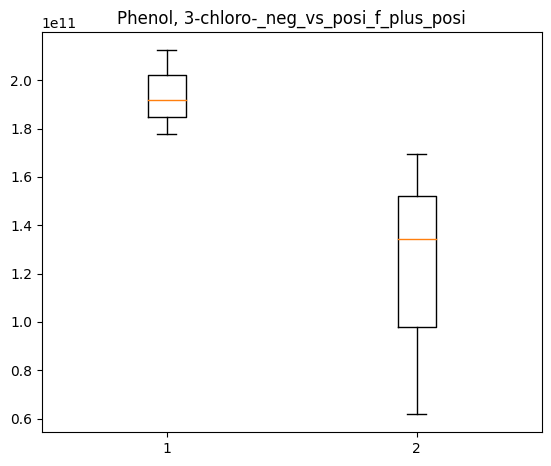

[array([2.4886e+11]), array([1.75658e+11]), array([2.4615e+11]), array([2.48860e+11, 1.75658e+11]), array([2.46150e+11, 1.75658e+11])]
[array([1.53056343e+10, 1.85400223e+10]), array([1.65450689e+10]), array([1.77113103e+10]), array([1.53056343e+10, 1.85400223e+10, 1.65450689e+10]), array([1.77113103e+10, 1.65450689e+10])]
[array([4.53308578e+10]), array([3.52636868e+09]), array([1.4157437e+10, 1.2537800e+12]), array([3.52636868e+09, 4.53308578e+10]), array([3.52636868e+09, 1.41574370e+10, 1.25378000e+12])]
[array([1.60644000e+11, 1.61435000e+11, 1.68206000e+11, 9.02433018e+10,
       1.73097000e+11]), array([1.75171e+11, 1.73211e+11, 1.59515e+11]), array([1.55837e+11, 1.47331e+11]), array([1.75171000e+11, 1.60644000e+11, 1.61435000e+11, 1.68206000e+11,
       9.02433018e+10, 1.73211000e+11, 1.59515000e+11, 1.73097000e+11]), array([1.75171e+11, 1.55837e+11, 1.47331e+11, 1.73211e+11, 1.59515e+11])]
[array([7.05522000e+11, 3.70033000e+11, 1.24307000e+11, 5.95188915e+10,
       1.03102000

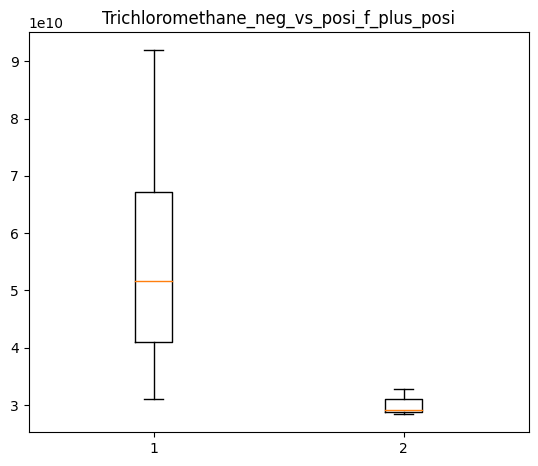

[array([5.86107152e+09, 5.30227553e+09, 6.17405005e+09, 3.81892924e+09,
       5.29889520e+09]), array([5.52159379e+09, 4.84580486e+09, 6.36276490e+09]), array([4.98058544e+09, 5.88993775e+09]), array([5.52159379e+09, 5.86107152e+09, 5.30227553e+09, 6.17405005e+09,
       3.81892924e+09, 4.84580486e+09, 6.36276490e+09, 5.29889520e+09]), array([5.52159379e+09, 4.98058544e+09, 5.88993775e+09, 4.84580486e+09,
       6.36276490e+09])]
[array([7.54242086e+09, 5.91213432e+09]), array([4.89630678e+09, 7.47405503e+09]), array([4.83665572e+09]), array([4.89630678e+09, 7.54242086e+09, 7.47405503e+09, 5.91213432e+09]), array([4.89630678e+09, 4.83665572e+09, 7.47405503e+09])]
[array([1.84148e+12, 1.68090e+12, 2.52767e+12, 1.90676e+12, 2.95452e+12]), array([1.34486e+12, 2.59110e+12, 2.10249e+12]), array([2.27269e+12, 2.83868e+12]), array([1.34486e+12, 1.84148e+12, 1.68090e+12, 2.52767e+12, 1.90676e+12,
       2.59110e+12, 2.10249e+12, 2.95452e+12]), array([1.34486e+12, 2.27269e+12, 2.83868e+12, 2.5

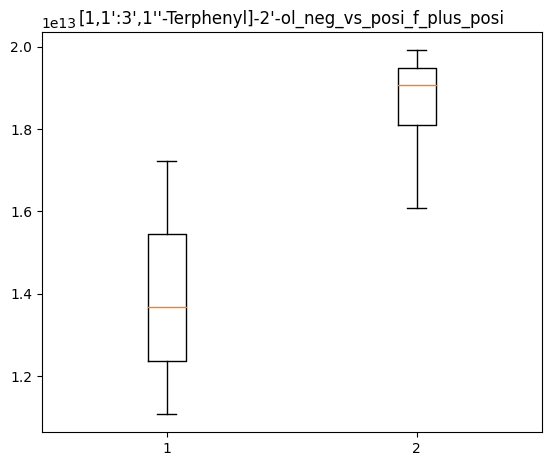

[array([3.20948e+12, 5.42641e+12]), array([2.03828e+11]), array([2.90201e+11]), array([2.03828e+11, 3.20948e+12, 5.42641e+12]), array([2.03828e+11, 2.90201e+11])]
[array([7.80757968e+10, 1.39162000e+11, 8.69555736e+10, 1.08545000e+11,
       1.31539000e+11]), array([1.26926000e+11, 4.94462992e+10, 9.28948256e+10]), array([7.71244788e+10, 1.17627000e+11]), array([1.26926000e+11, 7.80757968e+10, 1.39162000e+11, 8.69555736e+10,
       1.08545000e+11, 4.94462992e+10, 9.28948256e+10, 1.31539000e+11]), array([1.26926000e+11, 7.71244788e+10, 1.17627000e+11, 4.94462992e+10,
       9.28948256e+10])]
[array([3.02837252e+10]), array([1.37744447e+10, 2.02477232e+10]), array([1.01975896e+10]), array([3.02837252e+10, 1.37744447e+10, 2.02477232e+10]), array([1.01975896e+10, 1.37744447e+10, 2.02477232e+10])]
[array([7.33722147e+09, 1.22257211e+10, 1.30031092e+10, 4.99172795e+09,
       9.79783155e+09]), array([8.16890149e+09, 7.50300264e+09, 8.21159145e+09]), array([7.47358716e+09, 9.16428675e+09]), a

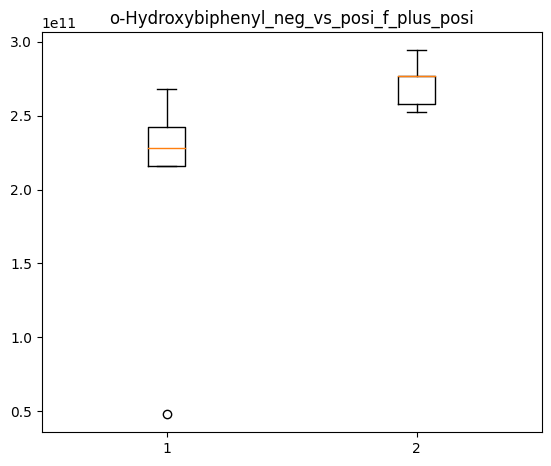

[array([4.40059765e+10, 5.99069327e+10, 6.80137847e+10, 3.12572001e+10,
       9.64608364e+10]), array([1.07426000e+11, 8.33767176e+10, 6.26351829e+10]), array([7.35433824e+10, 7.45271825e+10]), array([1.07426000e+11, 4.40059765e+10, 5.99069327e+10, 6.80137847e+10,
       3.12572001e+10, 8.33767176e+10, 6.26351829e+10, 9.64608364e+10]), array([1.07426000e+11, 7.35433824e+10, 7.45271825e+10, 8.33767176e+10,
       6.26351829e+10])]
[array([], dtype=float64), array([2.69052358e+10]), array([2.56552633e+10]), array([2.69052358e+10]), array([2.56552633e+10, 2.69052358e+10])]
[array([2.40289976e+09]), array([], dtype=float64), array([], dtype=float64), array([2.40289976e+09]), array([], dtype=float64)]
[array([1.48457705e+10, 1.75121429e+10, 1.96676764e+10, 9.11185260e+09,
       1.71975294e+10]), array([1.83980920e+10, 3.03588474e+10, 1.36464768e+10]), array([1.37477811e+10, 1.29580024e+10]), array([1.83980920e+10, 1.48457705e+10, 1.75121429e+10, 1.96676764e+10,
       9.11185260e+09, 3.03

In [88]:
key = group_dict_name['neg_vs_posi_f_plus_posi']
print(key)
skipped_neg_vs_posi_f_plus_posi_mol = find_biom.filter_molecules_by_p_value(mol_list, mol_data_list, labels, mode=key, plot=True, skip=True) 

# (Negatif + Positif Faible) vs Positif

2
neg_plus_posi_f_vs_posi


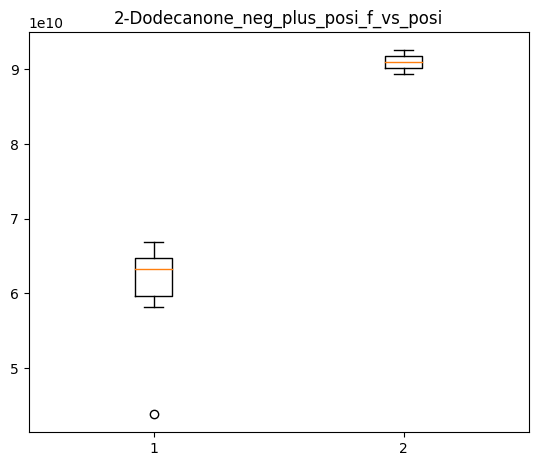

neg_plus_posi_f_vs_posi


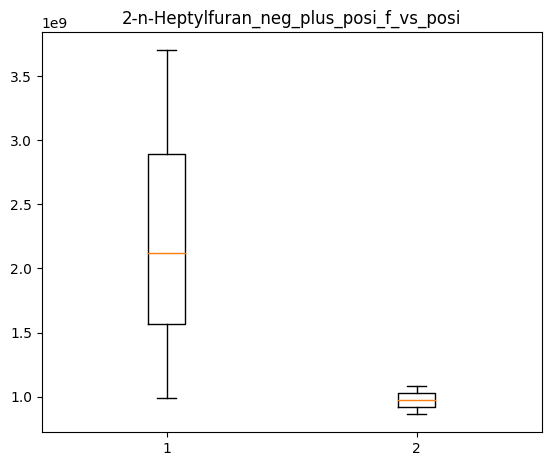

neg_plus_posi_f_vs_posi


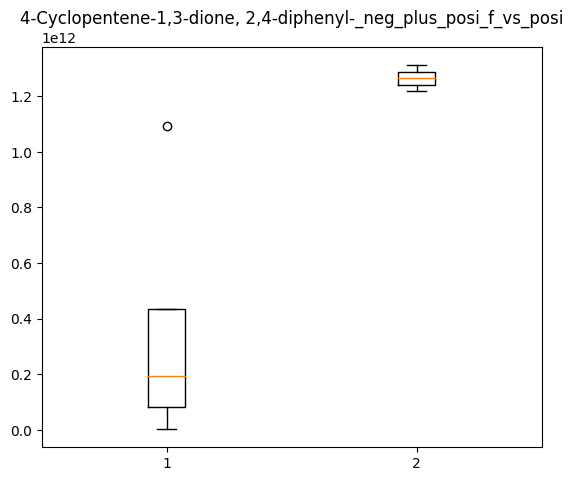

neg_plus_posi_f_vs_posi


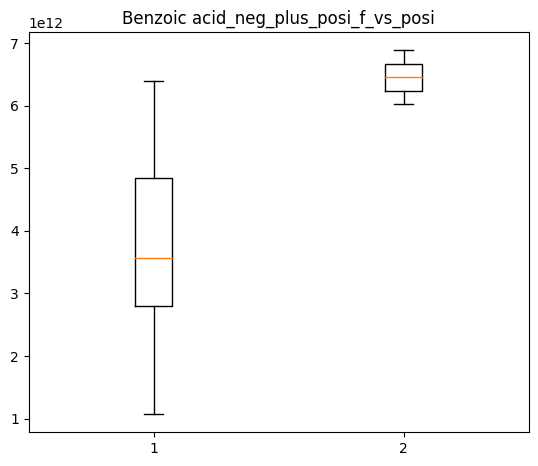

neg_plus_posi_f_vs_posi


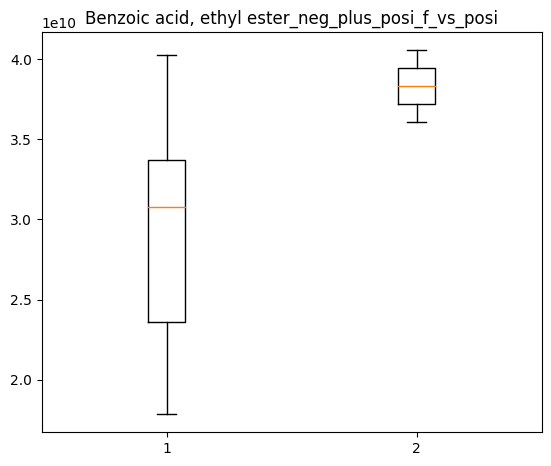

neg_plus_posi_f_vs_posi


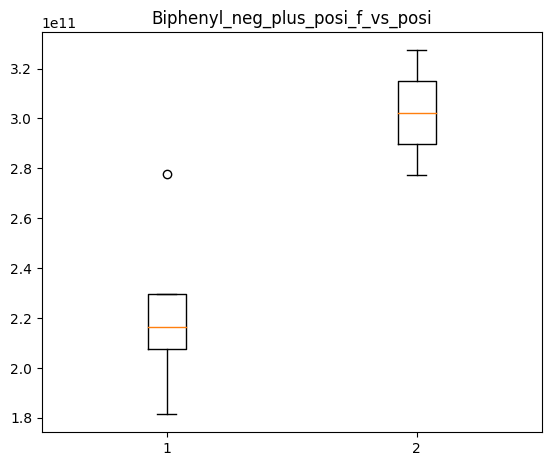

neg_plus_posi_f_vs_posi


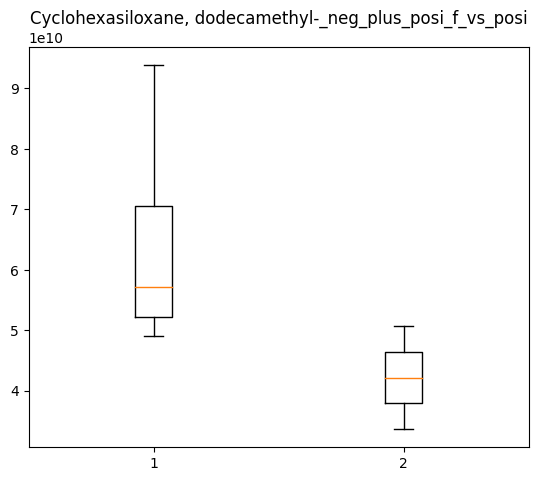

neg_plus_posi_f_vs_posi


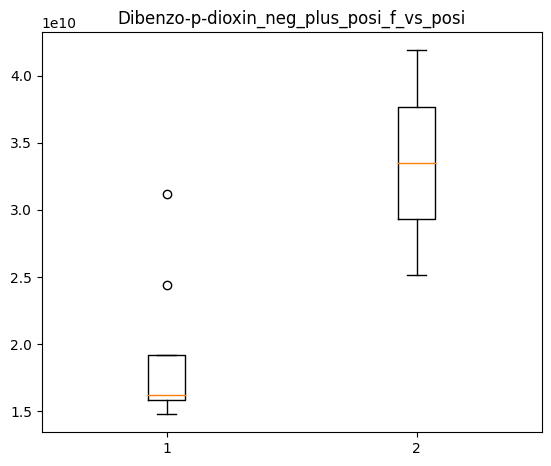

neg_plus_posi_f_vs_posi


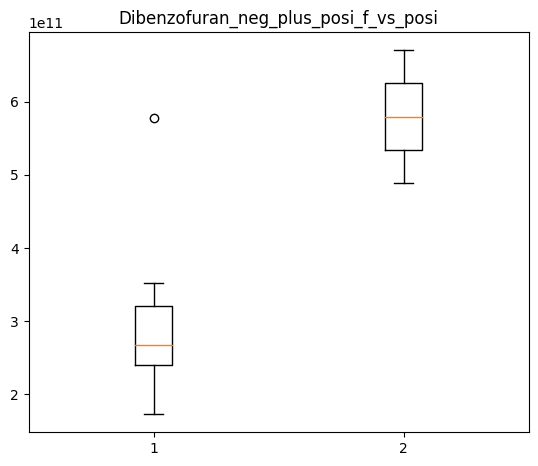

neg_plus_posi_f_vs_posi


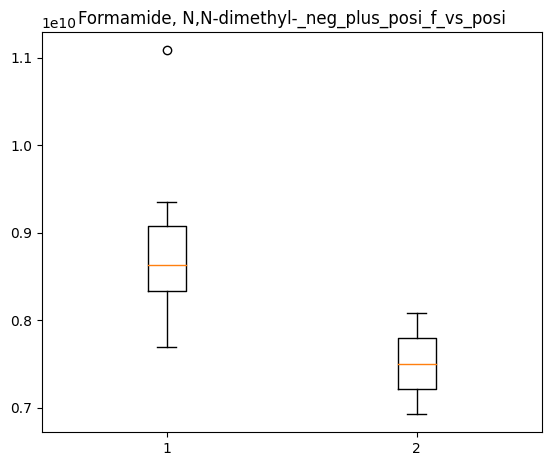

neg_plus_posi_f_vs_posi


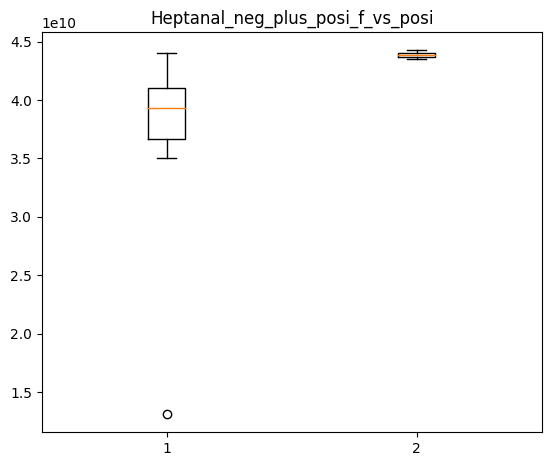

neg_plus_posi_f_vs_posi


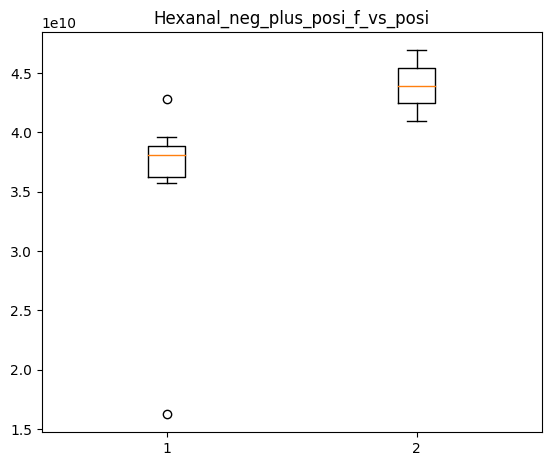

neg_plus_posi_f_vs_posi


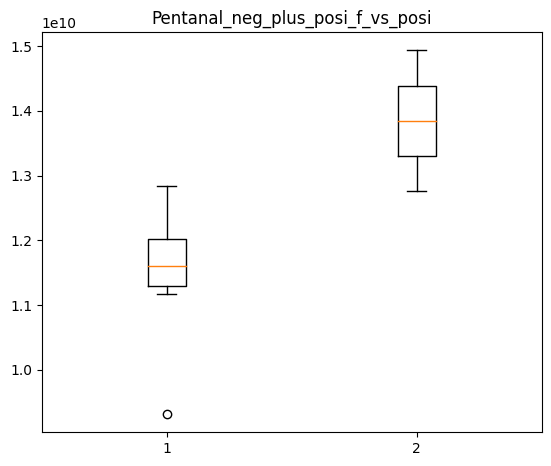

neg_plus_posi_f_vs_posi


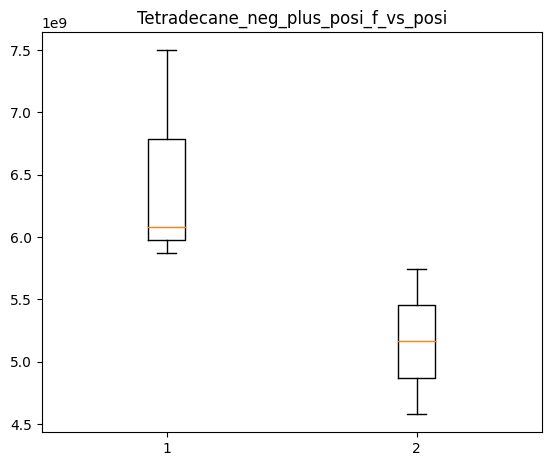

In [52]:
key = group_dict_name['neg_plus_posi_f_vs_posi']
print(key)
neg_plus_posi_f_vs_posi_mol = find_biom.filter_molecules_by_p_value(mol_list, mol_data_list, labels, mode=key, plot=True) 

2
[array([3.02098e+11]), array([], dtype=float64), array([], dtype=float64), array([3.02098e+11]), array([], dtype=float64)]
[array([2.06706117e+10, 1.26819395e+10, 6.21372823e+10, 9.07812488e+10,
       4.44112970e+10]), array([2.82177410e+10, 3.69737923e+10, 3.60936135e+10]), array([4.43777803e+10, 1.16262273e+10]), array([2.82177410e+10, 2.06706117e+10, 1.26819395e+10, 6.21372823e+10,
       9.07812488e+10, 3.69737923e+10, 3.60936135e+10, 4.44112970e+10]), array([2.82177410e+10, 4.43777803e+10, 1.16262273e+10, 3.69737923e+10,
       3.60936135e+10])]
[array([2.80652110e+10, 5.63817244e+10, 3.53974023e+10, 2.21643250e+10,
       6.17606007e+10]), array([5.18226833e+10, 4.89668044e+10, 4.21205369e+10]), array([6.20277332e+10, 4.56519314e+10]), array([5.18226833e+10, 2.80652110e+10, 5.63817244e+10, 3.53974023e+10,
       2.21643250e+10, 4.89668044e+10, 4.21205369e+10, 6.17606007e+10]), array([5.18226833e+10, 6.20277332e+10, 4.56519314e+10, 4.89668044e+10,
       4.21205369e+10])]
[arra

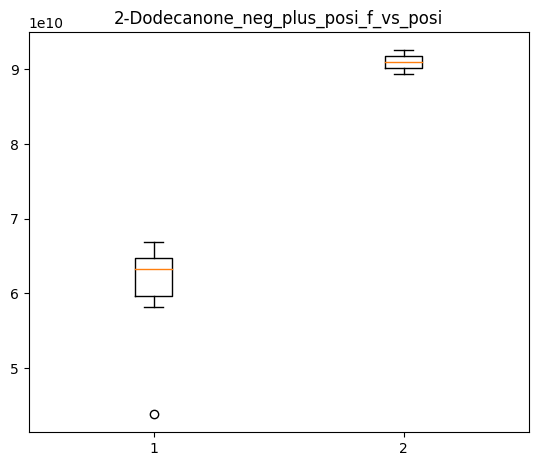

[array([], dtype=float64), array([], dtype=float64), array([8.21819148e+09]), array([], dtype=float64), array([8.21819148e+09])]
[array([4.38256333e+10]), array([4.85903005e+10]), array([], dtype=float64), array([4.38256333e+10, 4.85903005e+10]), array([4.85903005e+10])]
[array([2.14984e+11, 2.01321e+11, 2.26518e+11, 1.59412e+11, 2.07787e+11]), array([1.94537e+11, 2.05826e+11, 2.05398e+11]), array([2.79798e+11, 2.03485e+11]), array([1.94537e+11, 2.14984e+11, 2.01321e+11, 2.26518e+11, 1.59412e+11,
       2.05826e+11, 2.05398e+11, 2.07787e+11]), array([1.94537e+11, 2.79798e+11, 2.03485e+11, 2.05826e+11, 2.05398e+11])]
[array([2.37369398e+10, 1.64453833e+10, 1.95465468e+10]), array([2.24598444e+10, 1.90926208e+10]), array([2.08059735e+10, 2.26040958e+10]), array([2.24598444e+10, 2.37369398e+10, 1.64453833e+10, 1.90926208e+10,
       1.95465468e+10]), array([2.24598444e+10, 2.08059735e+10, 2.26040958e+10, 1.90926208e+10])]
[array([2.34984501e+10]), array([], dtype=float64), array([], dtype

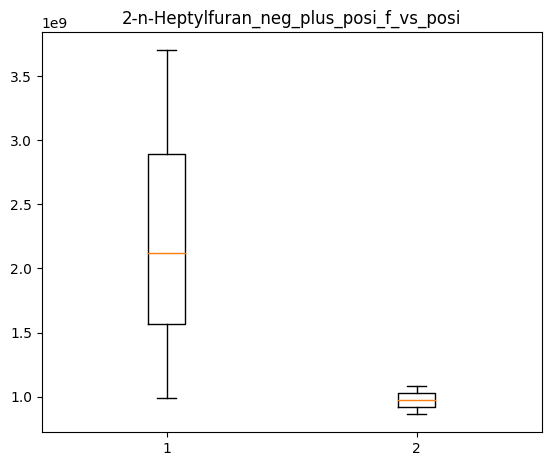

[array([8.6202061e+08]), array([1.12459364e+09]), array([9.49766665e+08]), array([8.62020610e+08, 1.12459364e+09]), array([9.49766665e+08, 1.12459364e+09])]
[array([1.01565e+12, 1.73687e+13, 3.11051e+11]), array([1.43875e+13, 1.19632e+12, 1.09975e+12]), array([8.03032e+11, 1.44122e+13]), array([1.43875e+13, 1.01565e+12, 1.73687e+13, 3.11051e+11, 1.19632e+12,
       1.09975e+12]), array([1.43875e+13, 8.03032e+11, 1.44122e+13, 1.19632e+12, 1.09975e+12])]
[array([9.25714111e+09, 9.49576882e+09, 1.56600909e+10, 1.17131572e+10]), array([1.00624900e+10, 1.24361955e+10, 1.91766487e+10]), array([1.02865441e+10, 1.07783059e+10]), array([1.00624900e+10, 9.25714111e+09, 9.49576882e+09, 1.56600909e+10,
       1.24361955e+10, 1.91766487e+10, 1.17131572e+10]), array([1.00624900e+10, 1.02865441e+10, 1.07783059e+10, 1.24361955e+10,
       1.91766487e+10])]
[array([3.05418000e+11, 3.20881000e+11, 3.36620000e+11, 7.56153575e+10,
       3.06480000e+11]), array([3.10401e+11, 3.03999e+11, 2.96899e+11]), ar

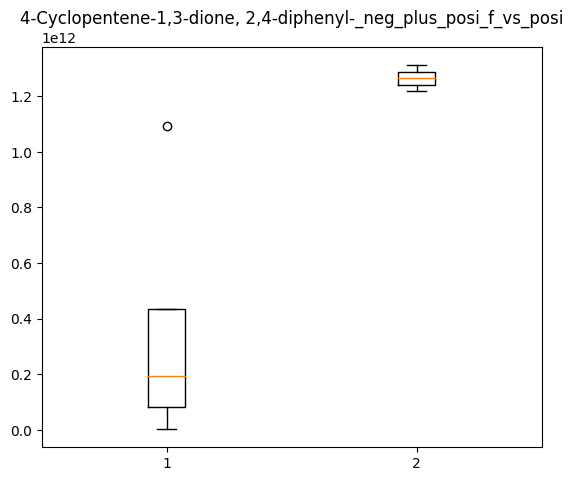

[array([7.00963950e+09, 1.15492000e+11, 6.26530628e+10, 1.90814831e+10,
       5.07122196e+10]), array([7.83102576e+10, 4.55578887e+10, 1.02554000e+11]), array([9.33857320e+10, 8.07877513e+10]), array([7.83102576e+10, 7.00963950e+09, 1.15492000e+11, 6.26530628e+10,
       1.90814831e+10, 4.55578887e+10, 1.02554000e+11, 5.07122196e+10]), array([7.83102576e+10, 9.33857320e+10, 8.07877513e+10, 4.55578887e+10,
       1.02554000e+11])]
[array([1.20586282e+10, 1.02657246e+10, 1.25141515e+10, 6.25621685e+09,
       1.18605332e+10]), array([1.06418800e+10, 1.20426755e+10, 1.16973795e+10]), array([1.04424086e+10, 1.01522464e+10]), array([1.06418800e+10, 1.20586282e+10, 1.02657246e+10, 1.25141515e+10,
       6.25621685e+09, 1.20426755e+10, 1.16973795e+10, 1.18605332e+10]), array([1.06418800e+10, 1.04424086e+10, 1.01522464e+10, 1.20426755e+10,
       1.16973795e+10])]
[array([1.43403e+12, 3.73398e+12, 4.28408e+12, 3.45708e+12]), array([3.39525e+12, 1.99451e+12, 2.23561e+12]), array([1.07982e+12, 

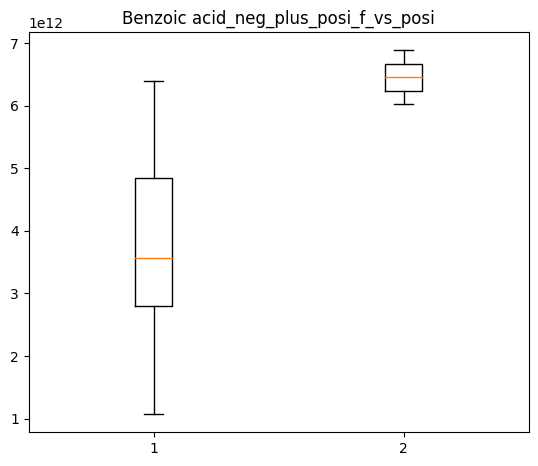

[array([7.28101979e+09, 1.46554788e+10, 1.20765116e+10, 2.64722445e+10]), array([1.8984031e+10]), array([8.60336779e+09]), array([7.28101979e+09, 1.46554788e+10, 1.20765116e+10, 1.89840310e+10,
       2.64722445e+10]), array([8.60336779e+09, 1.89840310e+10])]
[array([1.78583894e+10, 4.02487117e+10, 2.52549579e+10, 3.07629750e+10]), array([3.49695965e+10, 3.24116905e+10, 2.19237529e+10]), array([4.05315951e+10, 3.60776641e+10]), array([3.49695965e+10, 1.78583894e+10, 4.02487117e+10, 2.52549579e+10,
       3.24116905e+10, 2.19237529e+10, 3.07629750e+10]), array([3.49695965e+10, 4.05315951e+10, 3.60776641e+10, 3.24116905e+10,
       2.19237529e+10])]
neg_plus_posi_f_vs_posi


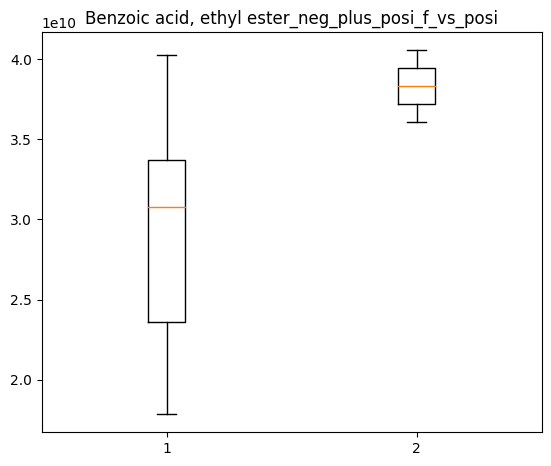

[array([2.19628e+11, 2.24939e+11, 2.48348e+11, 1.15114e+11, 2.25848e+11]), array([2.34241e+11, 2.30855e+11, 2.36626e+11]), array([2.42668e+11, 2.29054e+11]), array([2.34241e+11, 2.19628e+11, 2.24939e+11, 2.48348e+11, 1.15114e+11,
       2.30855e+11, 2.36626e+11, 2.25848e+11]), array([2.34241e+11, 2.42668e+11, 2.29054e+11, 2.30855e+11, 2.36626e+11])]
[array([4.90835e+11, 4.45079e+11, 5.60532e+11, 3.74820e+11, 5.93039e+11]), array([5.03421e+11, 5.06358e+11, 5.38360e+11]), array([4.88446e+11, 5.70834e+11]), array([5.03421e+11, 4.90835e+11, 4.45079e+11, 5.60532e+11, 3.74820e+11,
       5.06358e+11, 5.38360e+11, 5.93039e+11]), array([5.03421e+11, 4.88446e+11, 5.70834e+11, 5.06358e+11, 5.38360e+11])]
[array([3.89471499e+10, 1.64611231e+10]), array([], dtype=float64), array([], dtype=float64), array([3.89471499e+10, 1.64611231e+10]), array([], dtype=float64)]
[array([7.97237049e+09, 1.01393519e+10, 3.08391481e+10]), array([1.00169718e+10]), array([9.6724729e+09]), array([7.97237049e+09, 1.013

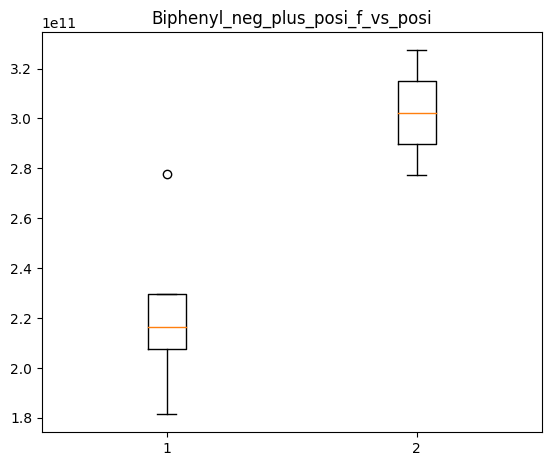

[array([8.03575e+11, 2.55662e+11]), array([3.61256e+12]), array([9.43622e+12]), array([3.61256e+12, 8.03575e+11, 2.55662e+11]), array([3.61256e+12, 9.43622e+12])]
[array([1.28219000e+11, 1.08704000e+11, 1.31717000e+11, 7.97238355e+10,
       1.28605000e+11]), array([6.86795179e+10, 1.37399000e+11, 1.16446000e+11]), array([1.27363e+11, 1.19212e+11]), array([6.86795179e+10, 1.28219000e+11, 1.08704000e+11, 1.31717000e+11,
       7.97238355e+10, 1.37399000e+11, 1.16446000e+11, 1.28605000e+11]), array([6.86795179e+10, 1.27363000e+11, 1.19212000e+11, 1.37399000e+11,
       1.16446000e+11])]
[array([7.16029752e+08, 8.76795876e+08, 9.03383690e+08, 9.46155974e+08]), array([3.29214572e+08]), array([9.95024407e+08]), array([7.16029752e+08, 8.76795876e+08, 9.03383690e+08, 3.29214572e+08,
       9.46155974e+08]), array([9.95024407e+08, 3.29214572e+08])]
[array([], dtype=float64), array([], dtype=float64), array([1.16314831e+10]), array([], dtype=float64), array([1.16314831e+10])]
[array([5.41773915

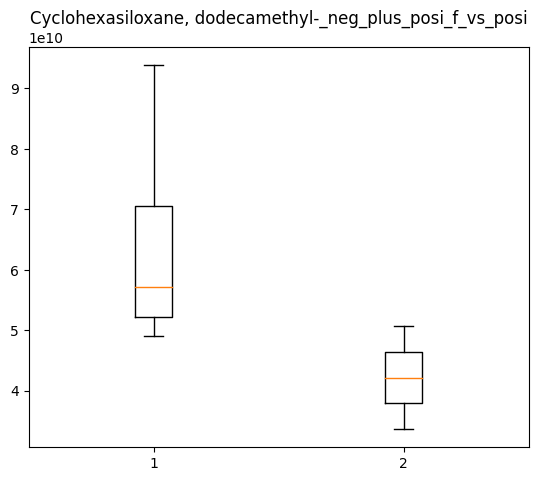

[array([3.56967410e+10, 4.81884519e+10, 1.67517825e+10, 6.28312445e+09,
       2.84974978e+10]), array([3.88052816e+10, 2.57452262e+10, 3.49068673e+10]), array([3.34972571e+10, 3.01028569e+10]), array([3.88052816e+10, 3.56967410e+10, 4.81884519e+10, 1.67517825e+10,
       6.28312445e+09, 2.57452262e+10, 3.49068673e+10, 2.84974978e+10]), array([3.88052816e+10, 3.34972571e+10, 3.01028569e+10, 2.57452262e+10,
       3.49068673e+10])]
[array([8.42568631e+10, 5.70720712e+10]), array([2.57035224e+10]), array([7.53513976e+10]), array([2.57035224e+10, 8.42568631e+10, 5.70720712e+10]), array([2.57035224e+10, 7.53513976e+10])]
[array([1.58151506e+10]), array([], dtype=float64), array([], dtype=float64), array([1.58151506e+10]), array([], dtype=float64)]
[array([1.31270000e+11, 1.24421000e+11, 1.37164000e+11, 8.75691353e+10,
       1.23602000e+11]), array([8.58326879e+10, 1.18597000e+11, 1.35473000e+11]), array([1.18867e+11, 1.19691e+11]), array([8.58326879e+10, 1.31270000e+11, 1.24421000e+11, 1.

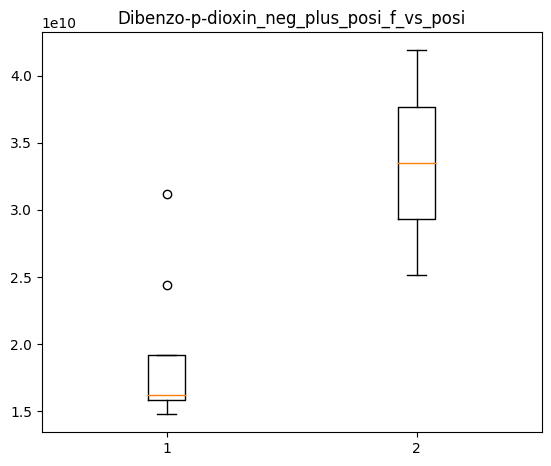

[array([2.22484e+11, 5.77573e+11, 3.51464e+11, 1.72897e+11, 3.10023e+11]), array([2.54205e+11, 2.80100e+11, 2.46541e+11]), array([6.69940e+11, 4.89343e+11]), array([2.54205e+11, 2.22484e+11, 5.77573e+11, 3.51464e+11, 1.72897e+11,
       2.80100e+11, 2.46541e+11, 3.10023e+11]), array([2.54205e+11, 6.69940e+11, 4.89343e+11, 2.80100e+11, 2.46541e+11])]
neg_plus_posi_f_vs_posi


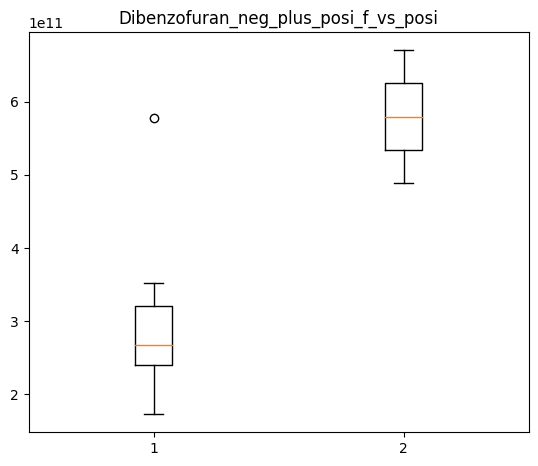

[array([2.00690794e+10, 2.37159742e+10, 2.03289040e+10]), array([3.7234471e+10]), array([1.31409259e+10, 4.32520102e+10]), array([2.00690794e+10, 2.37159742e+10, 2.03289040e+10, 3.72344710e+10]), array([1.31409259e+10, 4.32520102e+10, 3.72344710e+10])]
[array([5.29904696e+10]), array([], dtype=float64), array([], dtype=float64), array([5.29904696e+10]), array([], dtype=float64)]
[array([1.03668000e+11, 1.28056000e+11, 1.17324000e+11, 6.91639154e+10,
       1.53719000e+11]), array([1.08292e+11, 1.20572e+11, 1.16516e+11]), array([2.15674e+11, 1.04165e+11]), array([1.08292000e+11, 1.03668000e+11, 1.28056000e+11, 1.17324000e+11,
       6.91639154e+10, 1.20572000e+11, 1.16516000e+11, 1.53719000e+11]), array([1.08292e+11, 2.15674e+11, 1.04165e+11, 1.20572e+11, 1.16516e+11])]
[array([5.00389337e+09]), array([], dtype=float64), array([], dtype=float64), array([5.00389337e+09]), array([], dtype=float64)]
[array([2.83743143e+09, 2.99986738e+09, 3.83363036e+09, 9.70342219e+08,
       3.12588478e+

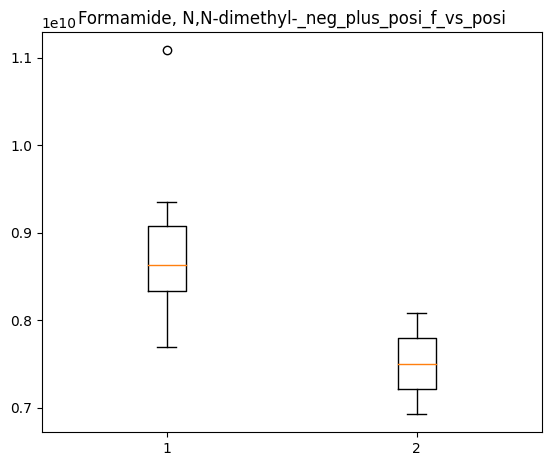

[array([8.44591346e+08]), array([], dtype=float64), array([], dtype=float64), array([8.44591346e+08]), array([], dtype=float64)]
[array([9.51518663e+10, 1.00337000e+11, 1.16543000e+11, 5.33049456e+10,
       1.01451000e+11]), array([3.54306748e+10, 1.06353000e+11, 1.02469000e+11]), array([9.83455929e+10, 1.05665000e+11]), array([3.54306748e+10, 9.51518663e+10, 1.00337000e+11, 1.16543000e+11,
       5.33049456e+10, 1.06353000e+11, 1.02469000e+11, 1.01451000e+11]), array([3.54306748e+10, 9.83455929e+10, 1.05665000e+11, 1.06353000e+11,
       1.02469000e+11])]
[array([8.07433058e+09, 8.18891361e+09, 9.92655236e+09, 9.05321528e+09]), array([6.90151184e+09, 8.30261492e+09]), array([], dtype=float64), array([6.90151184e+09, 8.07433058e+09, 8.18891361e+09, 9.92655236e+09,
       8.30261492e+09, 9.05321528e+09]), array([6.90151184e+09, 8.30261492e+09])]
[array([1.30439113e+09, 6.33653442e+08, 9.15786090e+08, 8.75979637e+08]), array([6.56947938e+08, 1.07184683e+09, 6.30437748e+08]), array([1.63

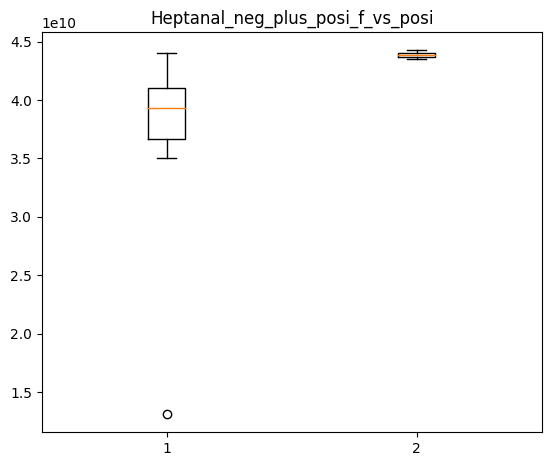

[array([1.93093691e+10, 1.26815595e+10, 1.67865555e+10, 9.36223738e+09,
       1.62165188e+10]), array([2.17697285e+10, 1.78265946e+10, 1.65204512e+10]), array([1.54288255e+10, 1.50940777e+10]), array([2.17697285e+10, 1.93093691e+10, 1.26815595e+10, 1.67865555e+10,
       9.36223738e+09, 1.78265946e+10, 1.65204512e+10, 1.62165188e+10]), array([2.17697285e+10, 1.54288255e+10, 1.50940777e+10, 1.78265946e+10,
       1.65204512e+10])]
[array([1.15010254e+10, 1.16954518e+10, 1.59995813e+10, 7.33060173e+09,
       1.37488532e+10]), array([1.04981029e+10, 1.35580833e+10, 1.12640225e+10]), array([1.21718867e+10, 1.20423851e+10]), array([1.04981029e+10, 1.15010254e+10, 1.16954518e+10, 1.59995813e+10,
       7.33060173e+09, 1.35580833e+10, 1.12640225e+10, 1.37488532e+10]), array([1.04981029e+10, 1.21718867e+10, 1.20423851e+10, 1.35580833e+10,
       1.12640225e+10])]
[array([3.25918966e+09, 3.16366640e+09, 3.83621986e+09, 1.24013582e+09,
       3.24183756e+09]), array([3.55111766e+09, 3.18645266

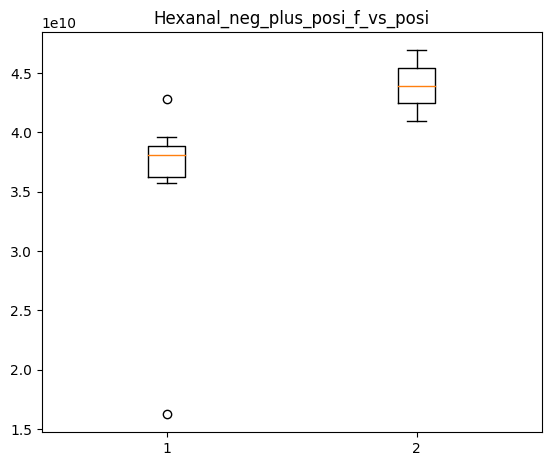

[array([1.59033e+11, 1.54235e+11, 1.77153e+11, 1.25307e+11, 1.72418e+11]), array([1.68660e+11, 1.67781e+11, 1.55210e+11]), array([1.71713e+11, 1.50914e+11]), array([1.68660e+11, 1.59033e+11, 1.54235e+11, 1.77153e+11, 1.25307e+11,
       1.67781e+11, 1.55210e+11, 1.72418e+11]), array([1.68660e+11, 1.71713e+11, 1.50914e+11, 1.67781e+11, 1.55210e+11])]
[array([], dtype=float64), array([], dtype=float64), array([2.77962747e+09]), array([], dtype=float64), array([2.77962747e+09])]
[array([1.99311412e+09, 1.50758625e+09]), array([1.43928289e+09, 1.27589563e+09]), array([2.07443016e+09]), array([1.43928289e+09, 1.99311412e+09, 1.27589563e+09, 1.50758625e+09]), array([1.43928289e+09, 2.07443016e+09, 1.27589563e+09])]
[array([2.76913453e+09, 3.16036361e+09, 3.30186604e+09, 2.26244920e+09,
       3.24345693e+09]), array([2.47451513e+09, 2.52140204e+09, 3.02711198e+09]), array([3.21809436e+09, 3.39345740e+09]), array([2.47451513e+09, 2.76913453e+09, 3.16036361e+09, 3.30186604e+09,
       2.262449

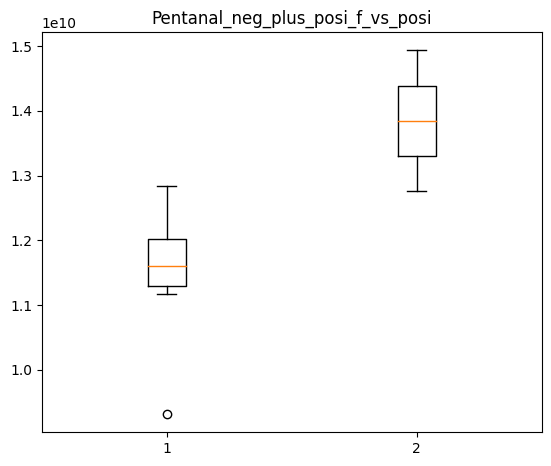

[array([1.99589816e+10, 1.88718910e+10, 2.91960454e+09, 1.91399522e+10,
       1.57317518e+10]), array([5.98222983e+09, 1.48433376e+10, 2.86428460e+09]), array([7.21662557e+08, 4.82072266e+09]), array([5.98222983e+09, 1.99589816e+10, 1.88718910e+10, 2.91960454e+09,
       1.91399522e+10, 1.48433376e+10, 2.86428460e+09, 1.57317518e+10]), array([5.98222983e+09, 7.21662557e+08, 4.82072266e+09, 1.48433376e+10,
       2.86428460e+09])]
[array([2.21938483e+09, 2.85737101e+09, 2.34254410e+09]), array([2.07663552e+09, 2.08536438e+09]), array([], dtype=float64), array([2.21938483e+09, 2.85737101e+09, 2.07663552e+09, 2.08536438e+09,
       2.34254410e+09]), array([2.07663552e+09, 2.08536438e+09])]
[array([1.23878064e+10, 1.36571672e+10, 2.09001376e+10, 8.70911420e+09,
       1.51847083e+10]), array([1.14071545e+10, 1.56778383e+10, 1.27385147e+10]), array([1.22048584e+10, 1.40786184e+10]), array([1.14071545e+10, 1.23878064e+10, 1.36571672e+10, 2.09001376e+10,
       8.70911420e+09, 1.56778383e+10

In [89]:
key = group_dict_name['neg_plus_posi_f_vs_posi']
print(key)
skipped_neg_plus_posi_f_vs_posi_mol = find_biom.filter_molecules_by_p_value(mol_list, mol_data_list, labels, mode=key, plot=True, skip=True) 

# Negatif vs Positif Faible vs Positif

3
neg_posi_vs_posi_f


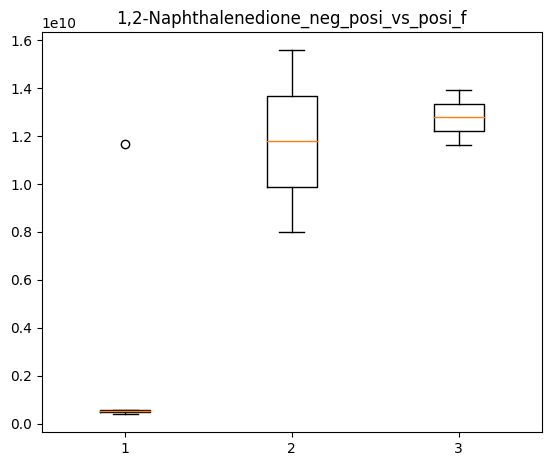

neg_posi_vs_posi_f


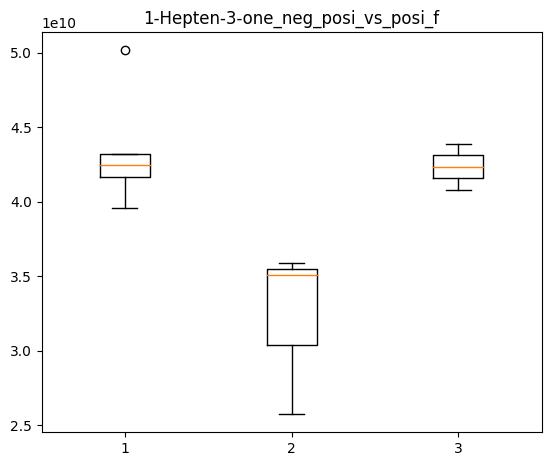

neg_posi_vs_posi_f


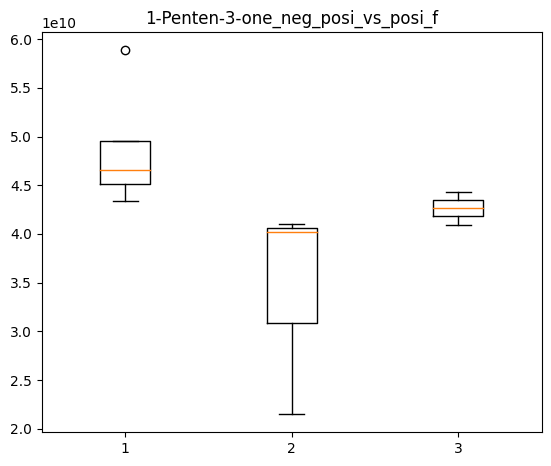

neg_posi_vs_posi_f


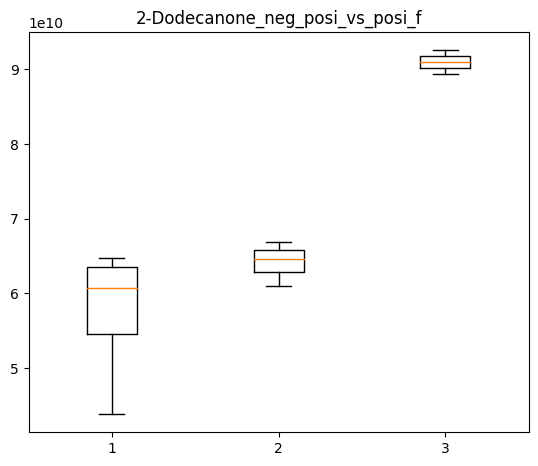

neg_posi_vs_posi_f


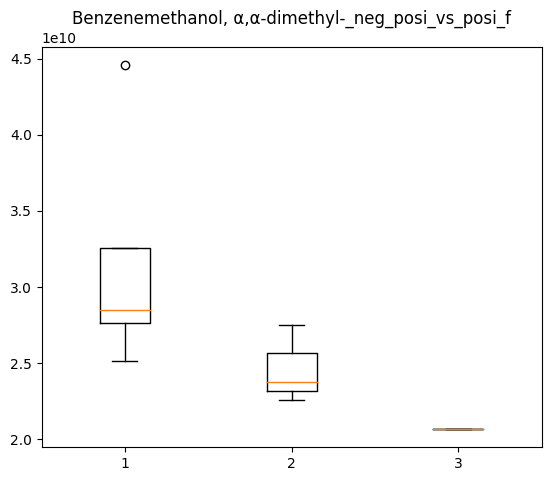

neg_posi_vs_posi_f


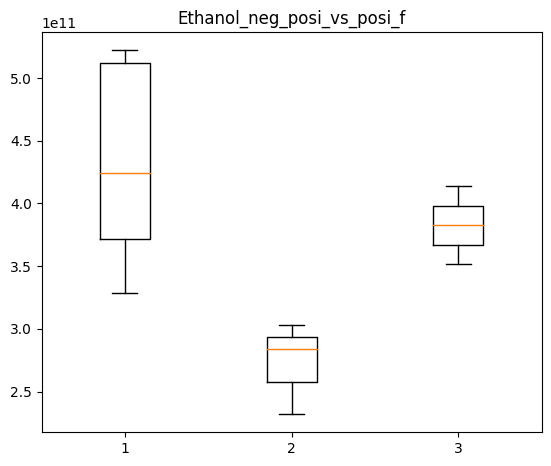

neg_posi_vs_posi_f


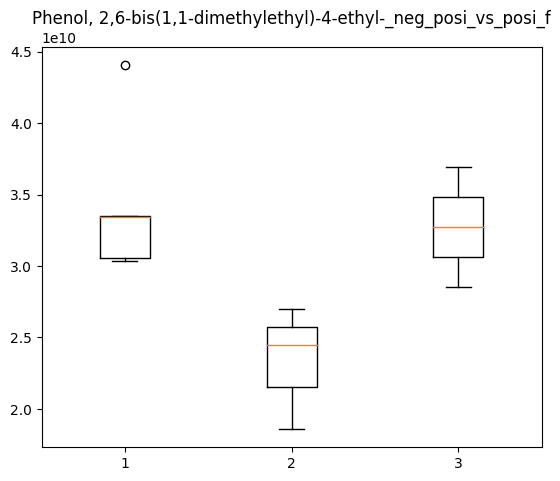

neg_posi_vs_posi_f


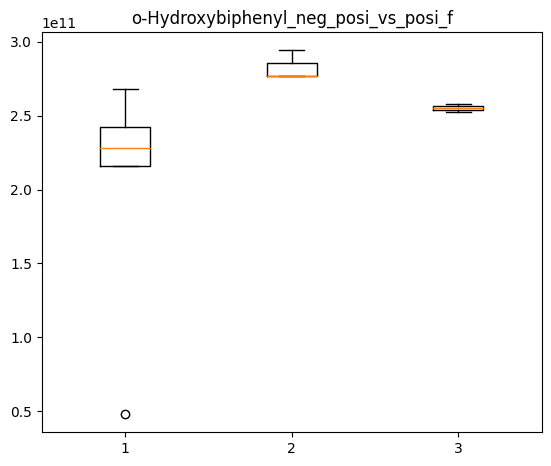

In [53]:
key = group_dict_name['neg_vs_posi_f_vs_posi']
print(key)
neg_vs_posi_f_vs_posi_mol = find_biom.filter_molecules_by_p_value(mol_list, mol_data_list, labels, mode=key, plot=True) 

3
[array([3.02098e+11]), array([], dtype=float64), array([], dtype=float64), array([3.02098e+11]), array([], dtype=float64)]
[array([2.06706117e+10, 1.26819395e+10, 6.21372823e+10, 9.07812488e+10,
       4.44112970e+10]), array([2.82177410e+10, 3.69737923e+10, 3.60936135e+10]), array([4.43777803e+10, 1.16262273e+10]), array([2.82177410e+10, 2.06706117e+10, 1.26819395e+10, 6.21372823e+10,
       9.07812488e+10, 3.69737923e+10, 3.60936135e+10, 4.44112970e+10]), array([2.82177410e+10, 4.43777803e+10, 1.16262273e+10, 3.69737923e+10,
       3.60936135e+10])]
[array([2.80652110e+10, 5.63817244e+10, 3.53974023e+10, 2.21643250e+10,
       6.17606007e+10]), array([5.18226833e+10, 4.89668044e+10, 4.21205369e+10]), array([6.20277332e+10, 4.56519314e+10]), array([5.18226833e+10, 2.80652110e+10, 5.63817244e+10, 3.53974023e+10,
       2.21643250e+10, 4.89668044e+10, 4.21205369e+10, 6.17606007e+10]), array([5.18226833e+10, 6.20277332e+10, 4.56519314e+10, 4.89668044e+10,
       4.21205369e+10])]
[arra

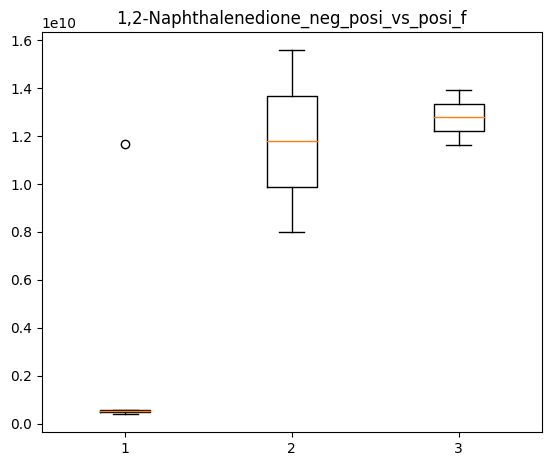

[array([1.07978e+11]), array([5.46327537e+10]), array([], dtype=float64), array([5.46327537e+10, 1.07978000e+11]), array([5.46327537e+10])]
[array([5.13269e+11, 5.20916e+11, 5.46791e+11, 5.31917e+11]), array([5.12770e+11, 5.25420e+11, 4.91251e+11]), array([5.34541e+11, 5.10509e+11]), array([5.12770e+11, 5.13269e+11, 5.20916e+11, 5.46791e+11, 5.25420e+11,
       4.91251e+11, 5.31917e+11]), array([5.12770e+11, 5.34541e+11, 5.10509e+11, 5.25420e+11, 4.91251e+11])]
[array([9.35041587e+10, 8.54475377e+10, 8.57295544e+10, 8.33440622e+10]), array([8.13632359e+10, 7.30554105e+10, 9.89978136e+10]), array([7.66235606e+10, 7.34057964e+10]), array([8.13632359e+10, 9.35041587e+10, 8.54475377e+10, 8.57295544e+10,
       7.30554105e+10, 9.89978136e+10, 8.33440622e+10]), array([8.13632359e+10, 7.66235606e+10, 7.34057964e+10, 7.30554105e+10,
       9.89978136e+10])]
[array([4.99934566e+10, 4.80501639e+10, 5.06282316e+10, 4.96123206e+10]), array([7.48415047e+10, 4.76098554e+10, 4.80925435e+10]), array([

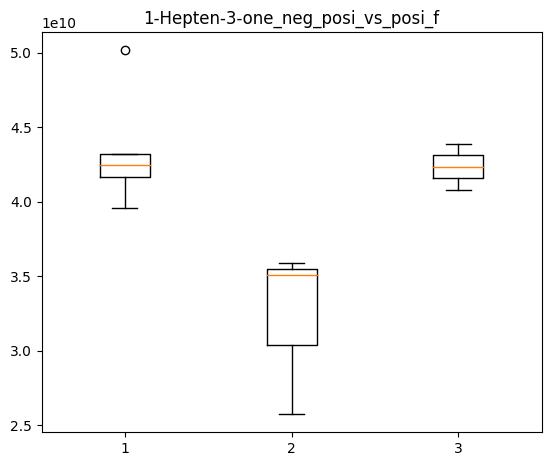

[array([1.01226345e+10, 9.44558647e+09, 1.18447884e+10, 1.01601745e+10]), array([1.06046860e+10, 1.02356613e+10]), array([1.03740938e+10, 1.03522445e+10]), array([1.01226345e+10, 9.44558647e+09, 1.18447884e+10, 1.06046860e+10,
       1.02356613e+10, 1.01601745e+10]), array([1.03740938e+10, 1.03522445e+10, 1.06046860e+10, 1.02356613e+10])]
[array([6.69972085e+10, 6.79134183e+10, 6.24443537e+10, 4.35795000e+10,
       6.72175416e+10]), array([7.45193542e+10, 4.80382521e+10, 6.15921085e+10]), array([5.89302035e+10, 6.22610788e+10]), array([7.45193542e+10, 6.69972085e+10, 6.79134183e+10, 6.24443537e+10,
       4.35795000e+10, 4.80382521e+10, 6.15921085e+10, 6.72175416e+10]), array([7.45193542e+10, 5.89302035e+10, 6.22610788e+10, 4.80382521e+10,
       6.15921085e+10])]
[array([2.23746e+11, 1.73661e+11, 5.26706e+11, 4.43366e+11, 2.00595e+11]), array([1.51645e+11, 4.87140e+11, 1.99684e+11]), array([1.44367e+11, 2.18609e+11]), array([1.51645e+11, 2.23746e+11, 1.73661e+11, 5.26706e+11, 4.43366

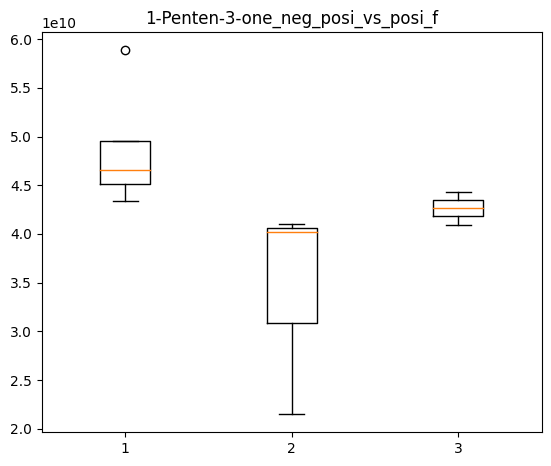

[array([1.17255000e+11, 1.07141000e+11, 8.76822589e+10, 1.11866000e+11]), array([9.81557442e+10, 1.08518000e+11, 1.11286000e+11]), array([1.10372e+11]), array([9.81557442e+10, 1.17255000e+11, 1.07141000e+11, 8.76822589e+10,
       1.08518000e+11, 1.11286000e+11, 1.11866000e+11]), array([9.81557442e+10, 1.10372000e+11, 1.08518000e+11, 1.11286000e+11])]
[array([1.74068857e+10, 1.24654605e+10, 1.71866048e+10, 1.01707031e+10,
       1.72465059e+10]), array([1.73243103e+10, 1.55620283e+10]), array([1.71966863e+10, 1.49724911e+10]), array([1.74068857e+10, 1.24654605e+10, 1.71866048e+10, 1.01707031e+10,
       1.73243103e+10, 1.55620283e+10, 1.72465059e+10]), array([1.71966863e+10, 1.49724911e+10, 1.73243103e+10, 1.55620283e+10])]
[array([6.20441163e+10, 6.70428343e+10, 6.62924282e+10, 3.91718614e+10,
       6.26083347e+10]), array([7.73012989e+10, 5.58319037e+10, 6.74209018e+10]), array([6.26534885e+10, 6.46881008e+10]), array([7.73012989e+10, 6.20441163e+10, 6.70428343e+10, 6.62924282e+10,


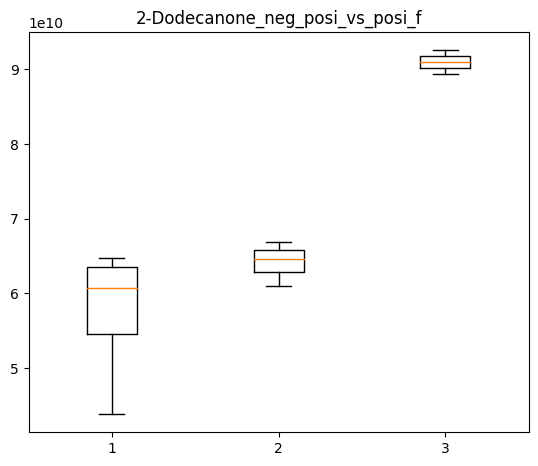

[array([], dtype=float64), array([], dtype=float64), array([8.21819148e+09]), array([], dtype=float64), array([8.21819148e+09])]
[array([4.38256333e+10]), array([4.85903005e+10]), array([], dtype=float64), array([4.38256333e+10, 4.85903005e+10]), array([4.85903005e+10])]
[array([2.14984e+11, 2.01321e+11, 2.26518e+11, 1.59412e+11, 2.07787e+11]), array([1.94537e+11, 2.05826e+11, 2.05398e+11]), array([2.79798e+11, 2.03485e+11]), array([1.94537e+11, 2.14984e+11, 2.01321e+11, 2.26518e+11, 1.59412e+11,
       2.05826e+11, 2.05398e+11, 2.07787e+11]), array([1.94537e+11, 2.79798e+11, 2.03485e+11, 2.05826e+11, 2.05398e+11])]
[array([2.37369398e+10, 1.64453833e+10, 1.95465468e+10]), array([2.24598444e+10, 1.90926208e+10]), array([2.08059735e+10, 2.26040958e+10]), array([2.24598444e+10, 2.37369398e+10, 1.64453833e+10, 1.90926208e+10,
       1.95465468e+10]), array([2.24598444e+10, 2.08059735e+10, 2.26040958e+10, 1.90926208e+10])]
[array([2.34984501e+10]), array([], dtype=float64), array([], dtype

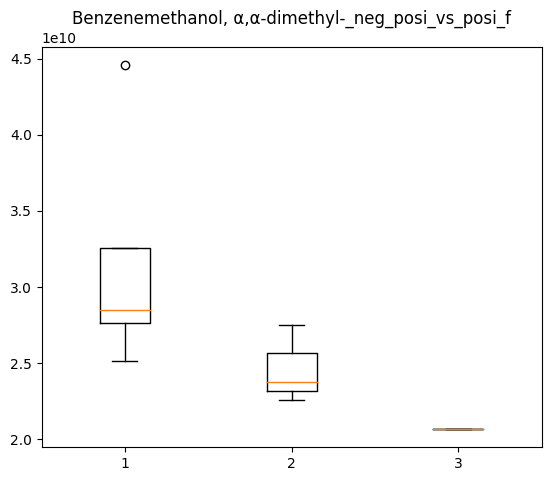

[array([1.19638224e+10]), array([], dtype=float64), array([], dtype=float64), array([1.19638224e+10]), array([], dtype=float64)]
[array([2.05052e+12, 4.23272e+11]), array([1.86657e+12, 3.91909e+12, 1.51981e+12]), array([1.41739e+11, 1.86915e+12]), array([1.86657e+12, 2.05052e+12, 4.23272e+11, 3.91909e+12, 1.51981e+12]), array([1.86657e+12, 1.41739e+11, 1.86915e+12, 3.91909e+12, 1.51981e+12])]
[array([2.30931818e+09, 2.84397923e+09, 8.29687422e+09, 5.07667177e+09]), array([8.13623314e+09, 3.78732659e+09]), array([3.85832918e+09]), array([2.30931818e+09, 2.84397923e+09, 8.29687422e+09, 8.13623314e+09,
       3.78732659e+09, 5.07667177e+09]), array([3.85832918e+09, 8.13623314e+09, 3.78732659e+09])]
[array([2.14045620e+09, 2.21711591e+09, 2.40556871e+09]), array([2.50369799e+09]), array([], dtype=float64), array([2.14045620e+09, 2.21711591e+09, 2.50369799e+09, 2.40556871e+09]), array([2.50369799e+09])]
[array([7.10861e+11, 6.80994e+11, 6.93379e+11, 3.75459e+11, 7.42619e+11]), array([7.5465

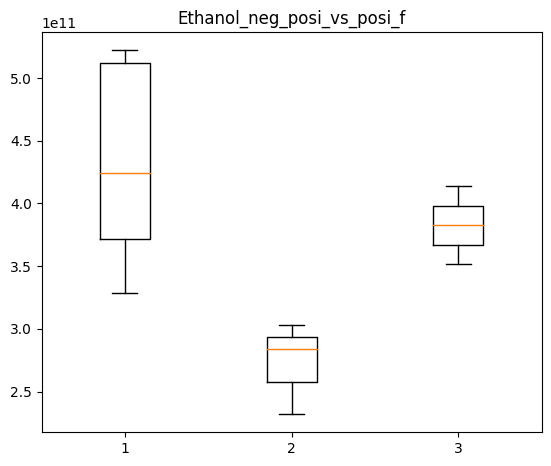

[array([9.05103099e+09, 9.32034945e+09, 6.38051146e+09, 8.59452382e+09]), array([1.02243999e+10, 8.90146427e+09]), array([9.04904071e+09]), array([1.02243999e+10, 9.05103099e+09, 9.32034945e+09, 6.38051146e+09,
       8.90146427e+09, 8.59452382e+09]), array([1.02243999e+10, 9.04904071e+09, 8.90146427e+09])]
[array([3.06705428e+09, 4.29184263e+09]), array([2.64445568e+09]), array([], dtype=float64), array([3.06705428e+09, 4.29184263e+09, 2.64445568e+09]), array([2.64445568e+09])]
[array([6.02672476e+10, 7.61200198e+10, 7.51372445e+10, 1.85084653e+10,
       6.72101458e+10]), array([7.29891239e+10, 7.49619576e+10, 6.55992545e+10]), array([6.72418800e+10, 4.64244935e+10]), array([7.29891239e+10, 6.02672476e+10, 7.61200198e+10, 7.51372445e+10,
       1.85084653e+10, 7.49619576e+10, 6.55992545e+10, 6.72101458e+10]), array([7.29891239e+10, 6.72418800e+10, 4.64244935e+10, 7.49619576e+10,
       6.55992545e+10])]
[array([1.91618629e+10, 1.71475854e+10, 1.52998756e+10, 4.83160577e+09,
       1.

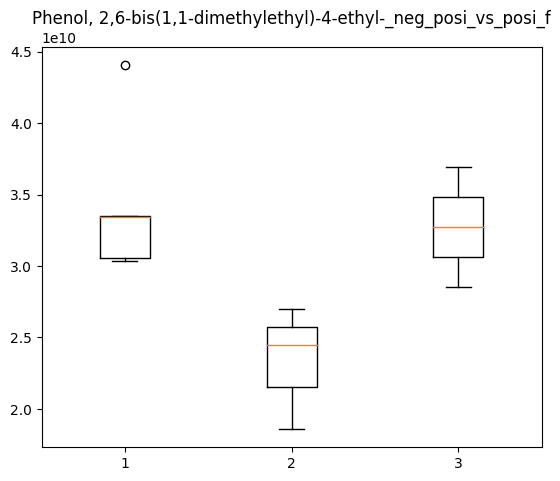

[array([4.66548886e+10]), array([], dtype=float64), array([], dtype=float64), array([4.66548886e+10]), array([], dtype=float64)]
[array([4.36026e+11, 4.86136e+11, 4.87033e+11, 1.59225e+11, 4.97673e+11]), array([4.03487e+11, 3.95391e+11, 4.47380e+11]), array([4.74902e+11, 2.73073e+11]), array([4.03487e+11, 4.36026e+11, 4.86136e+11, 4.87033e+11, 1.59225e+11,
       3.95391e+11, 4.47380e+11, 4.97673e+11]), array([4.03487e+11, 4.74902e+11, 2.73073e+11, 3.95391e+11, 4.47380e+11])]
[array([], dtype=float64), array([], dtype=float64), array([3.08234448e+09]), array([], dtype=float64), array([3.08234448e+09])]
[array([8.33857943e+10, 1.33752000e+11]), array([1.63897233e+10]), array([3.35109e+11]), array([8.33857943e+10, 1.33752000e+11, 1.63897233e+10]), array([3.35109000e+11, 1.63897233e+10])]
[array([1.91817e+11, 1.77596e+11, 2.12323e+11]), array([1.34281000e+11, 1.69573000e+11, 6.18350428e+10]), array([], dtype=float64), array([1.34281000e+11, 1.91817000e+11, 1.77596000e+11, 1.69573000e+11,


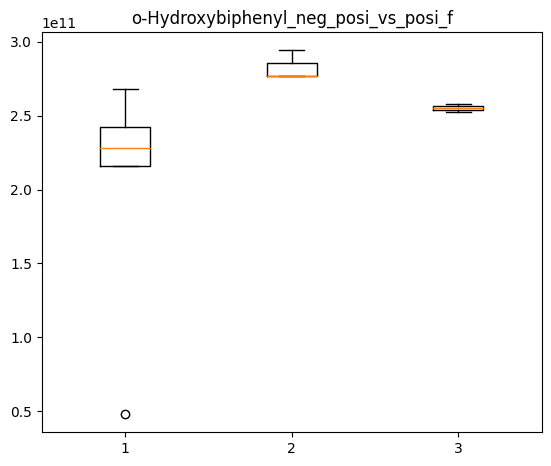

[array([4.40059765e+10, 5.99069327e+10, 6.80137847e+10, 3.12572001e+10,
       9.64608364e+10]), array([1.07426000e+11, 8.33767176e+10, 6.26351829e+10]), array([7.35433824e+10, 7.45271825e+10]), array([1.07426000e+11, 4.40059765e+10, 5.99069327e+10, 6.80137847e+10,
       3.12572001e+10, 8.33767176e+10, 6.26351829e+10, 9.64608364e+10]), array([1.07426000e+11, 7.35433824e+10, 7.45271825e+10, 8.33767176e+10,
       6.26351829e+10])]
[array([], dtype=float64), array([2.69052358e+10]), array([2.56552633e+10]), array([2.69052358e+10]), array([2.56552633e+10, 2.69052358e+10])]
[array([2.40289976e+09]), array([], dtype=float64), array([], dtype=float64), array([2.40289976e+09]), array([], dtype=float64)]
[array([1.48457705e+10, 1.75121429e+10, 1.96676764e+10, 9.11185260e+09,
       1.71975294e+10]), array([1.83980920e+10, 3.03588474e+10, 1.36464768e+10]), array([1.37477811e+10, 1.29580024e+10]), array([1.83980920e+10, 1.48457705e+10, 1.75121429e+10, 1.96676764e+10,
       9.11185260e+09, 3.03

In [90]:
key = group_dict_name['neg_vs_posi_f_vs_posi']
print(key)
skipped_neg_vs_posi_f_vs_posi_mol = find_biom.filter_molecules_by_p_value(mol_list, mol_data_list, labels, mode=key, plot=True, skip=True) 

# Negatif vs Positif - No Posi F

0
neg_vs_posi


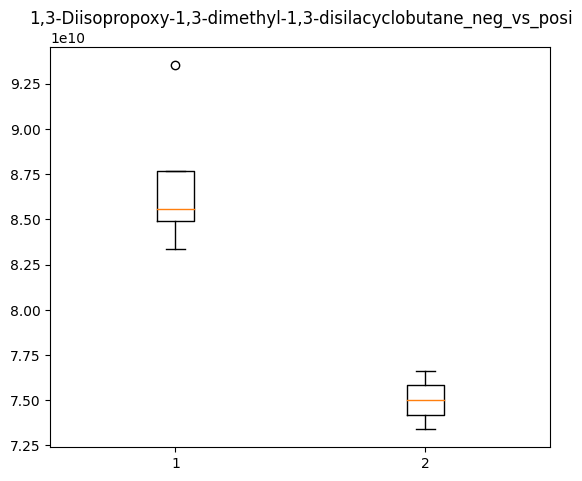

neg_vs_posi


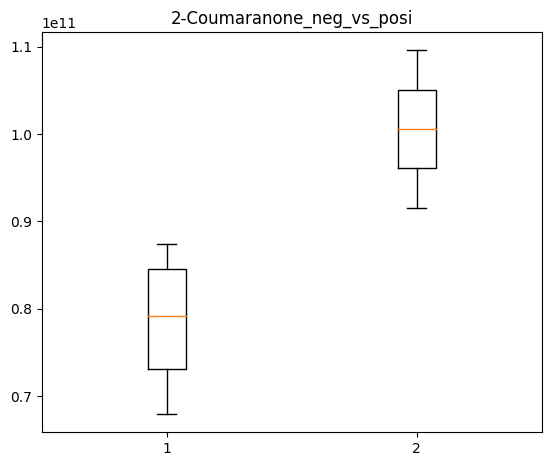

neg_vs_posi


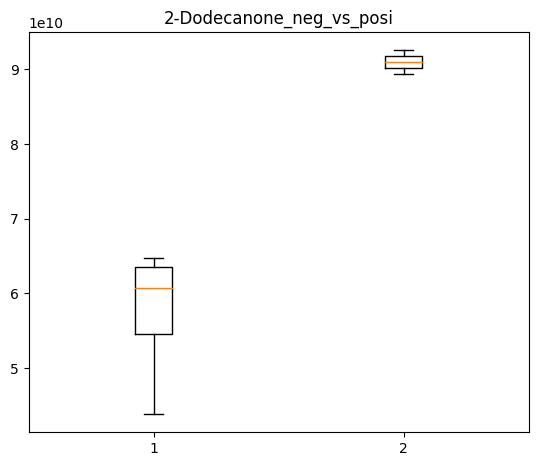

neg_vs_posi


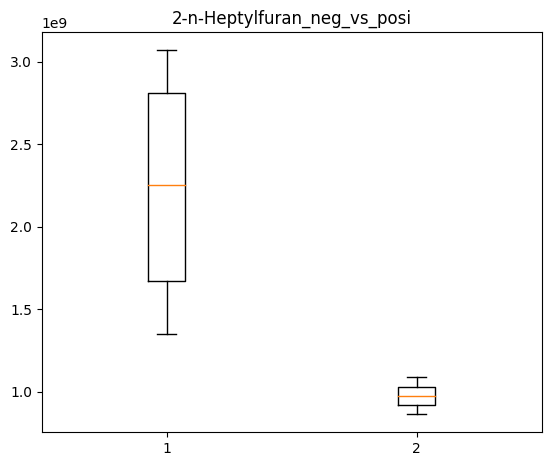

neg_vs_posi


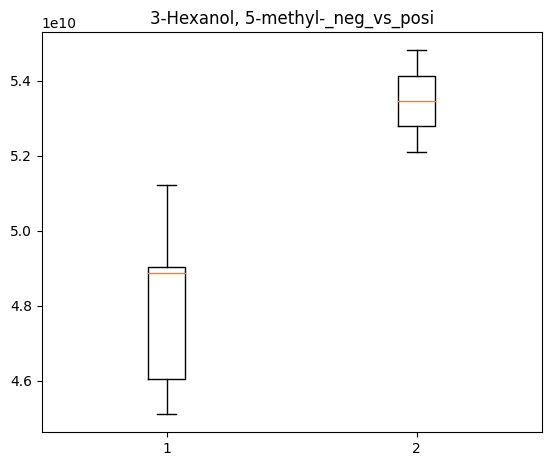

neg_vs_posi


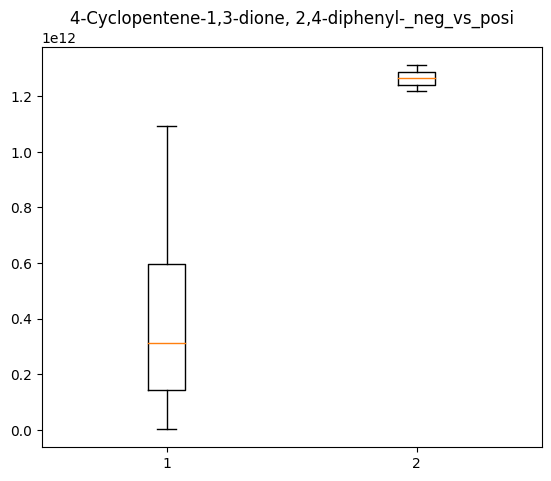

neg_vs_posi


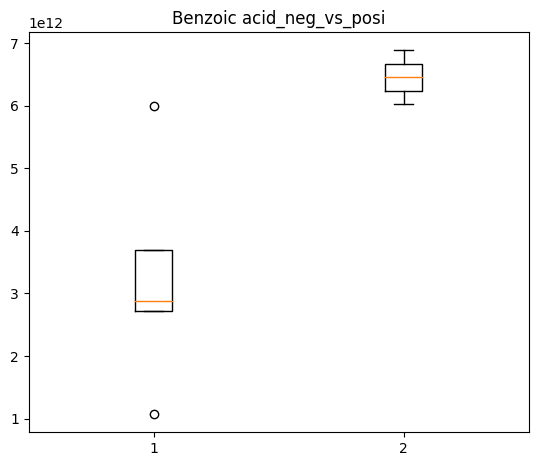

neg_vs_posi


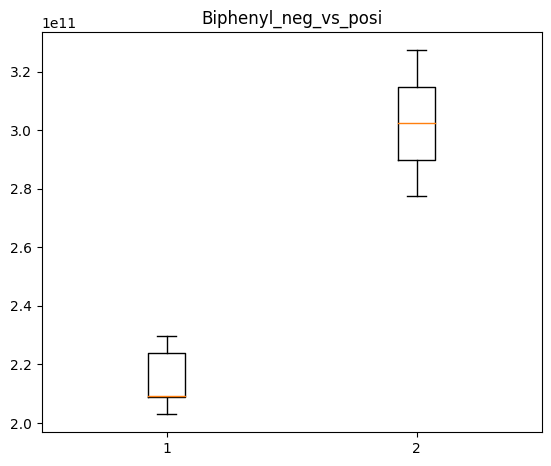

neg_vs_posi


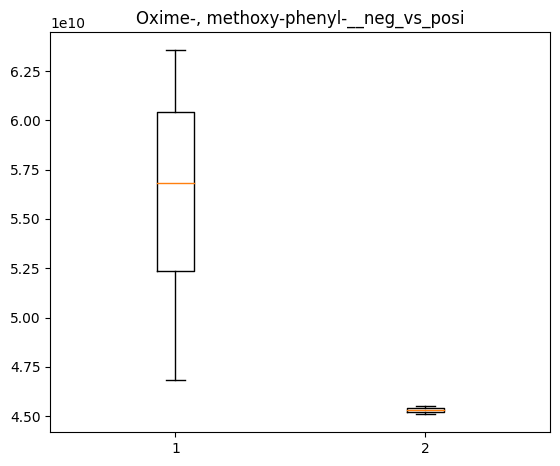

In [54]:
key = group_dict_name['neg_vs_posi']
print(key)
neg_vs_posi_mol = find_biom.filter_molecules_by_p_value(mol_list, mol_data_list, labels, mode=key, plot=True) 

0
[array([9.35041587e+10, 8.54475377e+10, 8.57295544e+10, 8.33440622e+10]), array([8.13632359e+10, 7.30554105e+10, 9.89978136e+10]), array([7.66235606e+10, 7.34057964e+10]), array([8.13632359e+10, 9.35041587e+10, 8.54475377e+10, 8.57295544e+10,
       7.30554105e+10, 9.89978136e+10, 8.33440622e+10]), array([8.13632359e+10, 7.66235606e+10, 7.34057964e+10, 7.30554105e+10,
       9.89978136e+10])]
0.06407750645105924


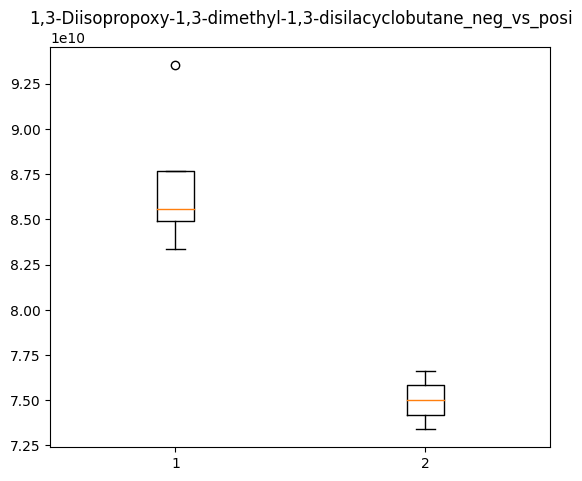

[array([3.69732485e+10, 2.80480619e+10, 2.33519441e+10]), array([], dtype=float64), array([], dtype=float64), array([3.69732485e+10, 2.80480619e+10, 2.33519441e+10]), array([], dtype=float64)]
nan


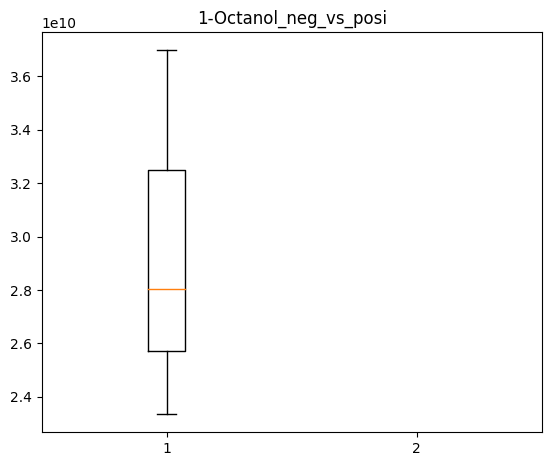

[array([8.72013364e+10, 5.80274872e+10, 9.25052163e+10, 8.96344249e+10]), array([], dtype=float64), array([], dtype=float64), array([8.72013364e+10, 5.80274872e+10, 9.25052163e+10, 8.96344249e+10]), array([], dtype=float64)]
nan


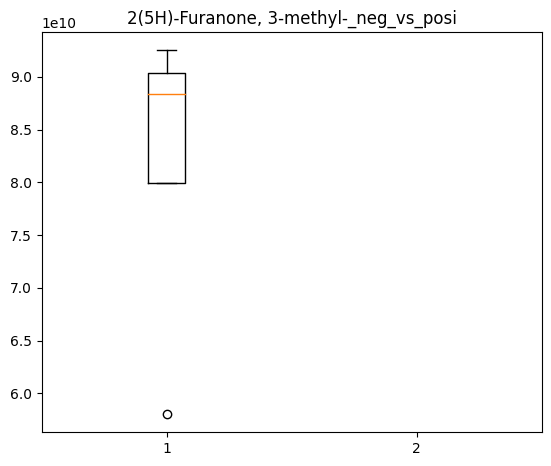

[array([6.79640475e+10, 8.36401649e+10, 7.48021011e+10, 8.73710661e+10]), array([7.84828044e+10, 7.85651746e+10, 1.12226000e+11]), array([9.15629694e+10, 1.09553000e+11]), array([7.84828044e+10, 6.79640475e+10, 8.36401649e+10, 7.48021011e+10,
       7.85651746e+10, 1.12226000e+11, 8.73710661e+10]), array([7.84828044e+10, 9.15629694e+10, 1.09553000e+11, 7.85651746e+10,
       1.12226000e+11])]
0.06407750645105924


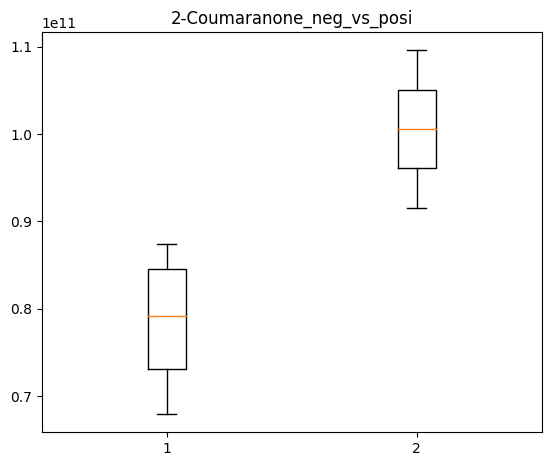

[array([6.32062476e+10, 4.38165613e+10, 5.82059691e+10, 6.47088108e+10]), array([6.09477762e+10, 6.68604846e+10, 6.46378317e+10]), array([8.94530043e+10, 9.25424500e+10]), array([6.09477762e+10, 6.32062476e+10, 4.38165613e+10, 5.82059691e+10,
       6.68604846e+10, 6.46378317e+10, 6.47088108e+10]), array([6.09477762e+10, 8.94530043e+10, 9.25424500e+10, 6.68604846e+10,
       6.46378317e+10])]
0.06407750645105924


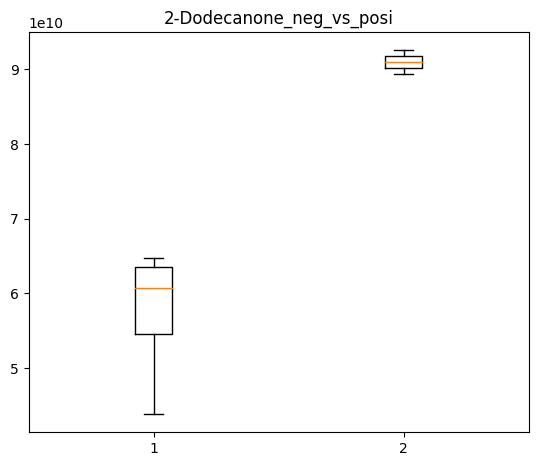

[array([2.72082804e+09, 1.34585385e+09, 3.06826332e+09, 1.78053142e+09]), array([9.86577857e+08, 3.70260575e+09, 2.12287406e+09]), array([1.08566734e+09, 8.63041520e+08]), array([9.86577857e+08, 2.72082804e+09, 1.34585385e+09, 3.06826332e+09,
       3.70260575e+09, 2.12287406e+09, 1.78053142e+09]), array([9.86577857e+08, 1.08566734e+09, 8.63041520e+08, 3.70260575e+09,
       2.12287406e+09])]
0.06407750645105924


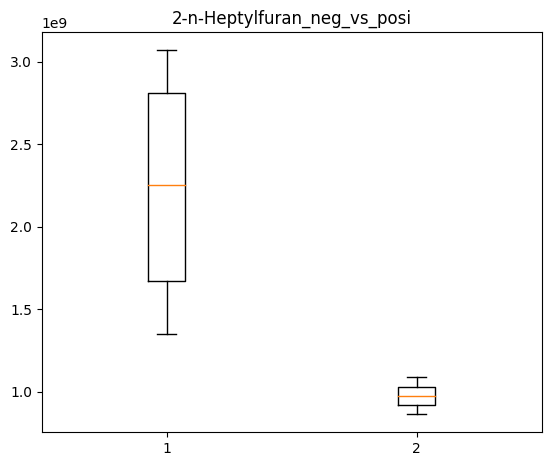

[array([2.04885540e+10, 3.47584175e+10, 1.18120994e+10]), array([2.10069635e+10]), array([], dtype=float64), array([2.04885540e+10, 3.47584175e+10, 1.18120994e+10, 2.10069635e+10]), array([2.10069635e+10])]
nan


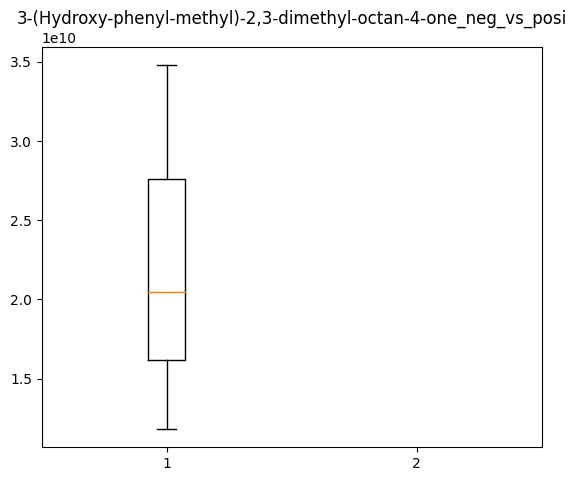

[array([4.88883450e+10, 5.12105936e+10, 4.60399022e+10, 4.51150093e+10,
       4.90280143e+10]), array([5.65576644e+10, 4.62346620e+10, 5.02559734e+10]), array([5.48106179e+10, 5.21079500e+10]), array([5.65576644e+10, 4.88883450e+10, 5.12105936e+10, 4.60399022e+10,
       4.51150093e+10, 4.62346620e+10, 5.02559734e+10, 4.90280143e+10]), array([5.65576644e+10, 5.48106179e+10, 5.21079500e+10, 4.62346620e+10,
       5.02559734e+10])]
0.052807511416113395


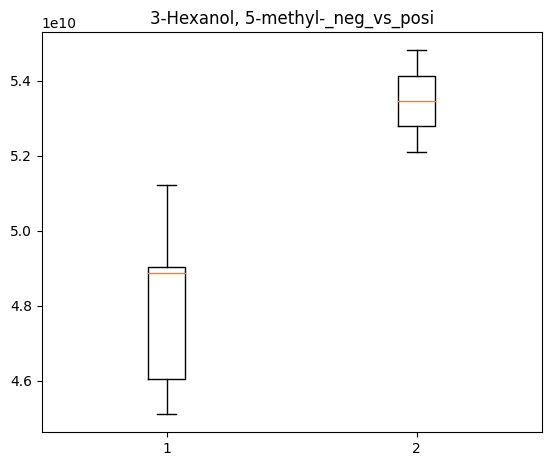

[array([4.33633000e+11, 1.92142000e+11, 2.70917281e+09, 1.09279000e+12]), array([8.05919057e+10]), array([1.21897e+12, 1.31093e+12]), array([4.33633000e+11, 1.92142000e+11, 2.70917281e+09, 8.05919057e+10,
       1.09279000e+12]), array([1.21897000e+12, 1.31093000e+12, 8.05919057e+10])]
0.06407750645105924


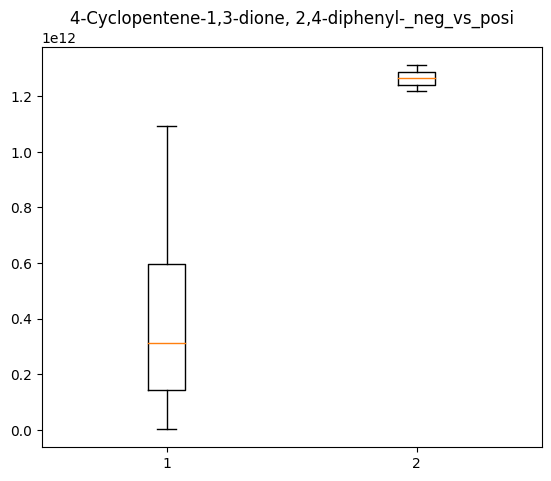

[array([5.89048000e+11, 6.51559251e+08, 7.19448000e+11, 4.98319000e+12]), array([3.06672e+11, 3.58508e+12]), array([], dtype=float64), array([3.06672000e+11, 5.89048000e+11, 6.51559251e+08, 7.19448000e+11,
       3.58508000e+12, 4.98319000e+12]), array([3.06672e+11, 3.58508e+12])]
nan


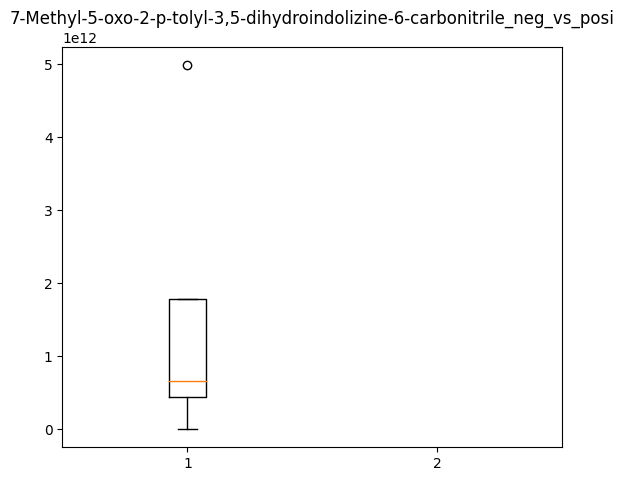

[array([2.91962859e+10, 4.76730389e+10, 2.99724982e+10, 4.91232986e+10]), array([5.76590633e+10, 3.63050767e+10]), array([], dtype=float64), array([5.76590633e+10, 2.91962859e+10, 4.76730389e+10, 2.99724982e+10,
       3.63050767e+10, 4.91232986e+10]), array([5.76590633e+10, 3.63050767e+10])]
nan


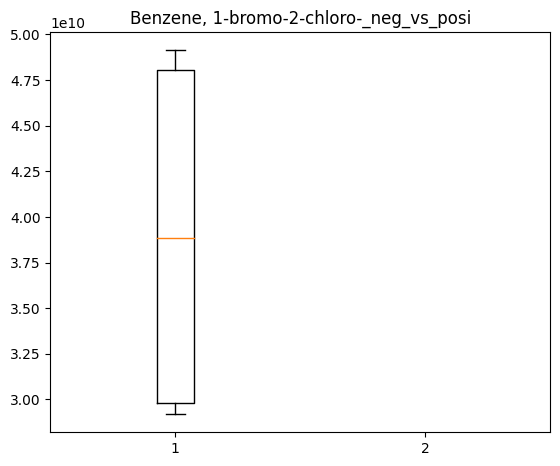

[array([2.14045620e+09, 2.21711591e+09, 2.40556871e+09]), array([2.50369799e+09]), array([], dtype=float64), array([2.14045620e+09, 2.21711591e+09, 2.50369799e+09, 2.40556871e+09]), array([2.50369799e+09])]
nan


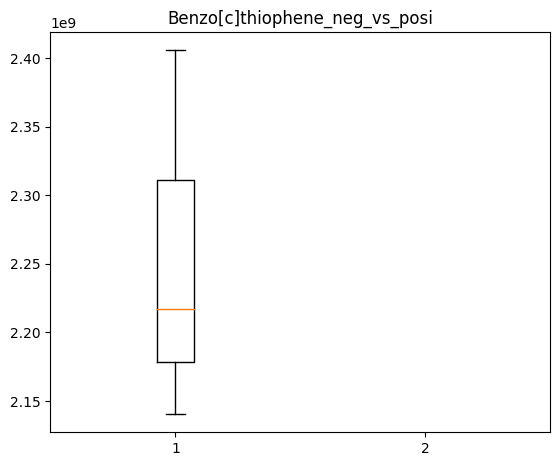

[array([5.99733e+12, 1.07217e+12, 2.71983e+12, 2.87129e+12, 3.68929e+12]), array([3.56703e+12, 6.40107e+12]), array([6.88189e+12, 6.02015e+12]), array([5.99733e+12, 1.07217e+12, 2.71983e+12, 2.87129e+12, 3.56703e+12,
       6.40107e+12, 3.68929e+12]), array([6.88189e+12, 6.02015e+12, 3.56703e+12, 6.40107e+12])]
0.052807511416113395


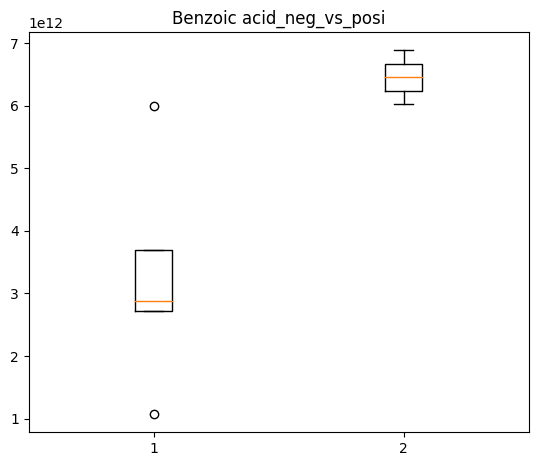

[array([2.08875e+11, 2.23763e+11, 2.03041e+11, 2.09157e+11, 2.29609e+11]), array([1.81506e+11, 2.29583e+11, 2.77846e+11]), array([2.77524e+11, 3.27265e+11]), array([1.81506e+11, 2.08875e+11, 2.23763e+11, 2.03041e+11, 2.09157e+11,
       2.29583e+11, 2.77846e+11, 2.29609e+11]), array([1.81506e+11, 2.77524e+11, 3.27265e+11, 2.29583e+11, 2.77846e+11])]
0.052807511416113395


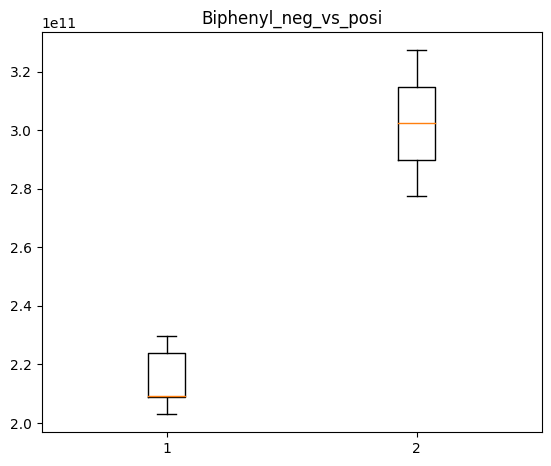

[array([5.41773915e+09, 9.03808482e+09, 6.15572926e+09]), array([5.91710728e+09, 6.04543219e+09]), array([], dtype=float64), array([5.91710728e+09, 5.41773915e+09, 9.03808482e+09, 6.04543219e+09,
       6.15572926e+09]), array([5.91710728e+09, 6.04543219e+09])]
nan


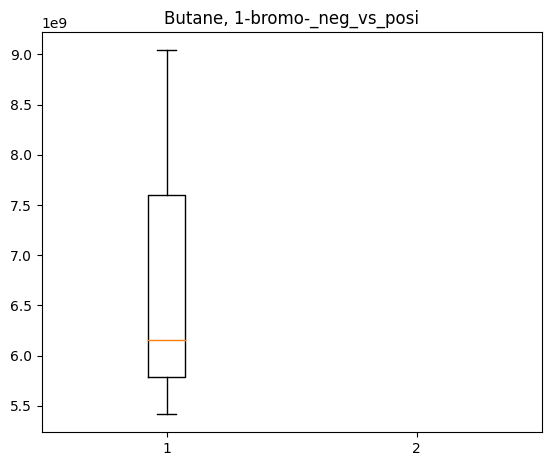

[array([8.07433058e+09, 8.18891361e+09, 9.92655236e+09, 9.05321528e+09]), array([6.90151184e+09, 8.30261492e+09]), array([], dtype=float64), array([6.90151184e+09, 8.07433058e+09, 8.18891361e+09, 9.92655236e+09,
       8.30261492e+09, 9.05321528e+09]), array([6.90151184e+09, 8.30261492e+09])]
nan


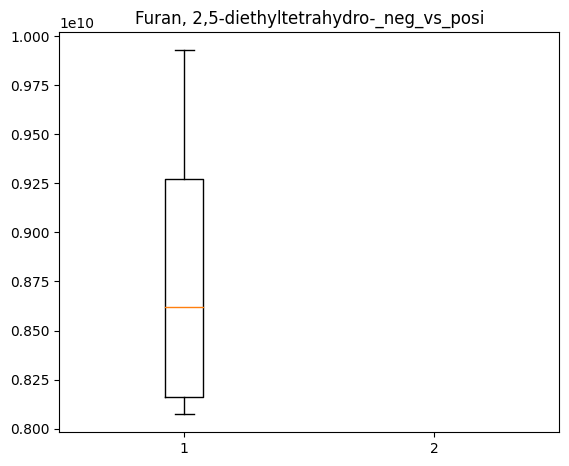

[array([7.39443750e+09, 4.80752399e+09, 1.92904754e+10]), array([1.79178562e+09, 1.13470755e+09]), array([], dtype=float64), array([7.39443750e+09, 4.80752399e+09, 1.79178562e+09, 1.13470755e+09,
       1.92904754e+10]), array([1.79178562e+09, 1.13470755e+09])]
nan


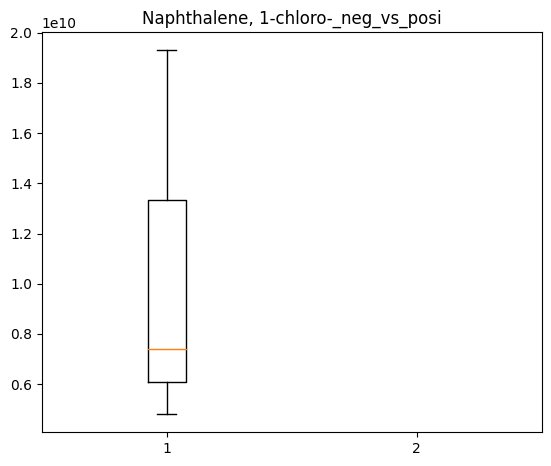

[array([6.02382153e+09, 8.15644412e+09, 7.59857266e+09]), array([8.66787445e+09, 5.01306545e+09]), array([], dtype=float64), array([6.02382153e+09, 8.15644412e+09, 7.59857266e+09, 8.66787445e+09,
       5.01306545e+09]), array([8.66787445e+09, 5.01306545e+09])]
nan


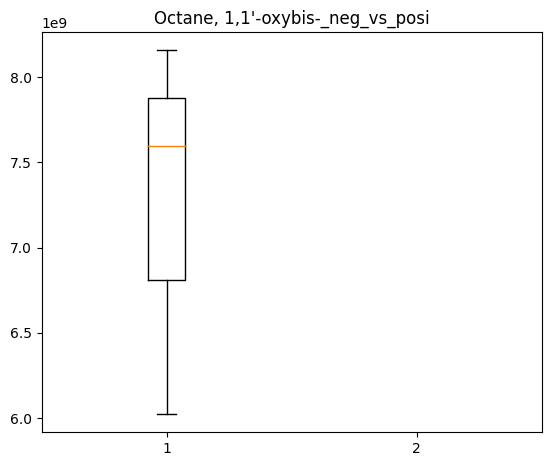

[array([5.42256464e+10, 5.93676912e+10, 6.35409484e+10, 4.68221171e+10]), array([5.64096441e+10, 4.22727872e+10, 6.03113742e+10]), array([4.51034943e+10, 4.55205640e+10]), array([5.64096441e+10, 5.42256464e+10, 5.93676912e+10, 6.35409484e+10,
       4.22727872e+10, 6.03113742e+10, 4.68221171e+10]), array([5.64096441e+10, 4.51034943e+10, 4.55205640e+10, 4.22727872e+10,
       6.03113742e+10])]
0.06407750645105924


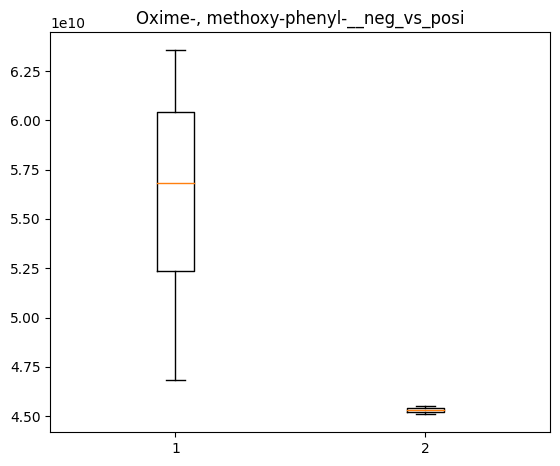

[array([2.21938483e+09, 2.85737101e+09, 2.34254410e+09]), array([2.07663552e+09, 2.08536438e+09]), array([], dtype=float64), array([2.21938483e+09, 2.85737101e+09, 2.07663552e+09, 2.08536438e+09,
       2.34254410e+09]), array([2.07663552e+09, 2.08536438e+09])]
nan


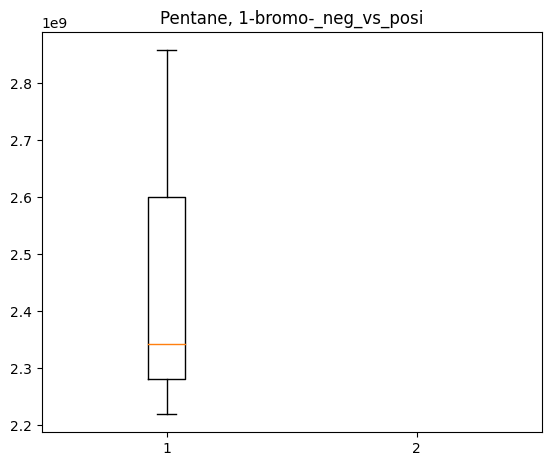

[array([1.91817e+11, 1.77596e+11, 2.12323e+11]), array([1.34281000e+11, 1.69573000e+11, 6.18350428e+10]), array([], dtype=float64), array([1.34281000e+11, 1.91817000e+11, 1.77596000e+11, 1.69573000e+11,
       6.18350428e+10, 2.12323000e+11]), array([1.34281000e+11, 1.69573000e+11, 6.18350428e+10])]
nan


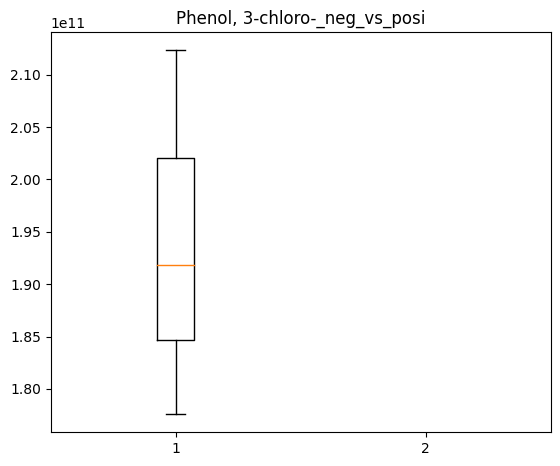

In [135]:
key = group_dict_name['neg_vs_posi']
print(key)
skipped_neg_vs_posi_mol = find_biom.filter_molecules_by_p_value(mol_list, mol_data_list, labels, mode=key, plot=True, skip=True, skip_nan=False) 

# Mol of interset

In [97]:
neg_vs_posi_f_plus_posi_mol, neg_plus_posi_f_vs_posi_mol, neg_vs_posi_f_vs_posi_mol, neg_vs_posi_mol

(['1,2-Naphthalenedione',
  '1-Butanone, 1-phenyl-',
  '1-Octen-3-ol',
  '1-Penten-3-one',
  '2-Dodecanone',
  '3-Hexanol, 5-methyl-',
  '3-Octanone',
  '9,10-Anthracenedione',
  'Benzene, n-butyl-',
  'Benzenemethanol, α,α-dimethyl-',
  'Benzoic acid',
  'Butanoic acid',
  'Cyclopentanone, 2-methyl-',
  'Ethanol',
  'Hex-1-enylbenzene',
  'Hexanal',
  'Linalool',
  'Methanone, 2-benzofuranylphenyl-',
  'Naphthalene, 1-chloro-',
  'Pentane',
  'Pentane, 1-bromo-',
  'Phenol, 2,6-bis(1,1-dimethylethyl)-4-ethyl-',
  'Phenol, 3-chloro-',
  'Phthalic anhydride',
  'Tetradecane',
  'Trichloromethane',
  "[1,1':3',1''-Terphenyl]-2'-ol",
  'o-Hydroxybiphenyl'],
 ['2-Dodecanone',
  '2-n-Heptylfuran',
  '4-Cyclopentene-1,3-dione, 2,4-diphenyl-',
  'Benzoic acid',
  'Benzoic acid, ethyl ester',
  'Biphenyl',
  'Cyclohexasiloxane, dodecamethyl-',
  'Dibenzo-p-dioxin',
  'Dibenzofuran',
  'Formamide, N,N-dimethyl-',
  'Heptanal',
  'Hexanal',
  'Pentanal',
  'Tetradecane'],
 ['1,2-Naphthalenedione

In [98]:
neg_vs_posi_f_plus_posi_mol, skipped_neg_vs_posi_f_plus_posi_mol, len(neg_vs_posi_f_plus_posi_mol), len(skipped_neg_vs_posi_f_plus_posi_mol)

(['1,2-Naphthalenedione',
  '1-Butanone, 1-phenyl-',
  '1-Octen-3-ol',
  '1-Penten-3-one',
  '2-Dodecanone',
  '3-Hexanol, 5-methyl-',
  '3-Octanone',
  '9,10-Anthracenedione',
  'Benzene, n-butyl-',
  'Benzenemethanol, α,α-dimethyl-',
  'Benzoic acid',
  'Butanoic acid',
  'Cyclopentanone, 2-methyl-',
  'Ethanol',
  'Hex-1-enylbenzene',
  'Hexanal',
  'Linalool',
  'Methanone, 2-benzofuranylphenyl-',
  'Naphthalene, 1-chloro-',
  'Pentane',
  'Pentane, 1-bromo-',
  'Phenol, 2,6-bis(1,1-dimethylethyl)-4-ethyl-',
  'Phenol, 3-chloro-',
  'Phthalic anhydride',
  'Tetradecane',
  'Trichloromethane',
  "[1,1':3',1''-Terphenyl]-2'-ol",
  'o-Hydroxybiphenyl'],
 ['1,2-Naphthalenedione',
  '1-Penten-3-one',
  '2-Dodecanone',
  '3-Hexanol, 5-methyl-',
  '3-Octanone',
  '9,10-Anthracenedione',
  'Benzene, n-butyl-',
  'Benzenemethanol, α,α-dimethyl-',
  'Benzoic acid',
  'Cyclopentanone, 2-methyl-',
  'Ethanol',
  'Hexanal',
  'Linalool',
  'Methanone, 2-benzofuranylphenyl-',
  'Pentane',
  'Phe

In [99]:
neg_plus_posi_f_vs_posi_mol, skipped_neg_plus_posi_f_vs_posi_mol, len(neg_plus_posi_f_vs_posi_mol), len(skipped_neg_plus_posi_f_vs_posi_mol)

(['2-Dodecanone',
  '2-n-Heptylfuran',
  '4-Cyclopentene-1,3-dione, 2,4-diphenyl-',
  'Benzoic acid',
  'Benzoic acid, ethyl ester',
  'Biphenyl',
  'Cyclohexasiloxane, dodecamethyl-',
  'Dibenzo-p-dioxin',
  'Dibenzofuran',
  'Formamide, N,N-dimethyl-',
  'Heptanal',
  'Hexanal',
  'Pentanal',
  'Tetradecane'],
 ['2-Dodecanone',
  '2-n-Heptylfuran',
  '4-Cyclopentene-1,3-dione, 2,4-diphenyl-',
  'Benzoic acid',
  'Benzoic acid, ethyl ester',
  'Biphenyl',
  'Cyclohexasiloxane, dodecamethyl-',
  'Dibenzo-p-dioxin',
  'Dibenzofuran',
  'Formamide, N,N-dimethyl-',
  'Heptanal',
  'Hexanal',
  'Pentanal'],
 14,
 13)

In [100]:
neg_vs_posi_f_vs_posi_mol, skipped_neg_vs_posi_f_vs_posi_mol, len(neg_vs_posi_f_vs_posi_mol), len(skipped_neg_vs_posi_f_vs_posi_mol)

(['1,2-Naphthalenedione',
  '1-Hepten-3-one',
  '1-Penten-3-one',
  '2-Dodecanone',
  'Benzenemethanol, α,α-dimethyl-',
  'Ethanol',
  'Phenol, 2,6-bis(1,1-dimethylethyl)-4-ethyl-',
  'o-Hydroxybiphenyl'],
 ['1,2-Naphthalenedione',
  '1-Hepten-3-one',
  '1-Penten-3-one',
  '2-Dodecanone',
  'Benzenemethanol, α,α-dimethyl-',
  'Ethanol',
  'Phenol, 2,6-bis(1,1-dimethylethyl)-4-ethyl-',
  'o-Hydroxybiphenyl'],
 8,
 8)

In [102]:
neg_vs_posi_mol, skipped_neg_vs_posi_mol, len(neg_vs_posi_mol), len(skipped_neg_vs_posi_mol)

(['1,3-Diisopropoxy-1,3-dimethyl-1,3-disilacyclobutane',
  '2-Coumaranone',
  '2-Dodecanone',
  '2-n-Heptylfuran',
  '3-Hexanol, 5-methyl-',
  '4-Cyclopentene-1,3-dione, 2,4-diphenyl-',
  'Benzoic acid',
  'Biphenyl',
  'Oxime-, methoxy-phenyl-_'],
 ['1,3-Diisopropoxy-1,3-dimethyl-1,3-disilacyclobutane',
  '2-Coumaranone',
  '2-Dodecanone',
  '2-n-Heptylfuran',
  '3-Hexanol, 5-methyl-',
  '4-Cyclopentene-1,3-dione, 2,4-diphenyl-',
  'Benzoic acid',
  'Biphenyl',
  'Oxime-, methoxy-phenyl-_'],
 9,
 9)

# Analyzes

In [8]:
files_unique = os.listdir(UNIQUE_PATH)
files_unique

['unique_mol_801850-A-C-01-157-split10.csv',
 'unique_mol_802111-P-M-01-158-split10.csv',
 'unique_mol_802115-A-Y-01-152-split10.csv',
 'unique_mol_802116-S-S-01-154-split10.csv',
 'unique_mol_802118-P-W-01-149-split10.csv',
 'unique_mol_817811-B-F-01-156-split10.csv',
 'unique_mol_817815-A-A-01-151-split10.csv',
 'unique_mol_817824-C-A-01-150-split10.csv',
 'unique_mol_817837-C-H-01-155-split10.csv',
 'unique_mol_817840-D-I-01-153-split10.csv']

In [9]:
features = []
for file in files_unique:
    sample_feature = np.zeros(len(unique_mol_list))
    for i, unique_mol in enumerate(unique_mol_list):
        df = pd.read_csv(UNIQUE_PATH + file, header=None)
        for index, row in df.iterrows():
            if (row[0] == unique_mol):
                sample_feature[i] = float(row[3])
    features.append(sample_feature)
features = np.array(features)
print(features.shape)

(10, 482)


## ACP

In [10]:
pca = PCA(n_components=2)
features_new_cd = pca.fit_transform(features)
pca.explained_variance_ratio_, pca.singular_values_

(array([0.66618992, 0.21620163]), array([8.52293493e+13, 4.85533980e+13]))

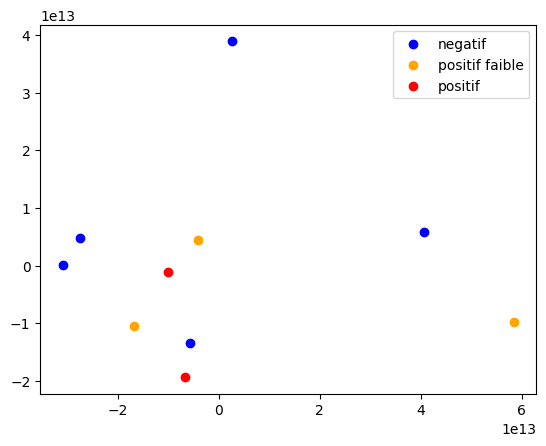

In [11]:
fig, ax = plt.subplots()
cdict = {'negatif': 'blue', 'positif faible': 'orange', 'positif': 'red'}

for g in ['negatif', 'positif faible', 'positif']:
    index = np.where(labels == g)
    p = features_new_cd[index]
    ax.scatter(p[:,0], p[:,1], c = cdict[g], label = g)
ax.legend()
plt.show()

In [12]:
features_neg_vs_pos_no_posi_f = [feature for i, feature in enumerate(features) if labels[i] == 'negatif' or labels[i] == 'positif']
pca = PCA(n_components=2)
features_new_cd_neg_vs_pos_no_posi_f = pca.fit_transform(features_neg_vs_pos_no_posi_f)
pca.explained_variance_ratio_, pca.singular_values_

(array([0.55344953, 0.30303597]), array([5.94802646e+13, 4.40130001e+13]))

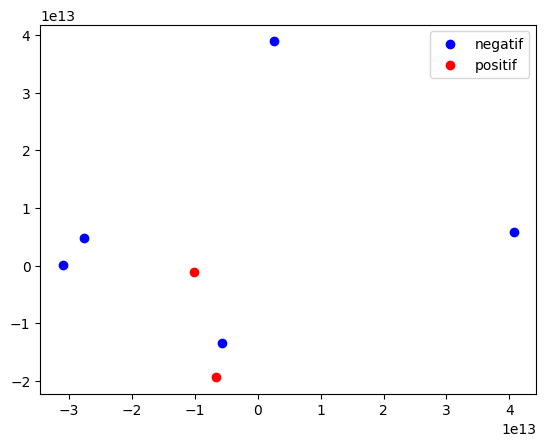

In [13]:
fig, ax = plt.subplots()
cdict = {'negatif': 'blue', 'positif': 'red'}

for g in ['negatif', 'positif']:
    index = np.where(labels == g)
    p = features_new_cd[index]
    ax.scatter(p[:,0], p[:,1], c = cdict[g], label = g)
ax.legend()
plt.show()

In [14]:
labels_dict = {'negatif': 0, 'positif faible': 1, 'positif': 2}

In [67]:
labels_dict = {'negatif': 0, 'positif faible': 1, 'positif': 1}

## RFE

In [16]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
features_new_cd_rfe = selector.fit_transform(features, y=[labels_dict[label] for label in labels])

In [ ]:
fig, ax = plt.subplots()
cdict = {'negatif': 'blue', 'positif faible': 'orange', 'positif': 'red'}

for g in ['negatif', 'positif faible', 'positif']:
    index = np.where(labels == g)
    p = features_new_cd_rfe[index]
    ax.scatter(p[:,0], p[:,1], c = cdict[g], label = g)
ax.legend()
plt.show()

## RF

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
clf = RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(features, y=[labels_dict[label] for label in labels])

RandomForestClassifier(random_state=0)

In [70]:
sorted_relevant_features = np.argsort(-clf.feature_importances_)
print(np.sort(-clf.feature_importances_))
relevant_mol = unique_mol_list[sorted_relevant_features]
relevant_mol[:10]

[-0.06       -0.02642857 -0.02309524 -0.02       -0.02       -0.01666667
 -0.01666667 -0.01642857 -0.01583333 -0.01555556 -0.01416667 -0.01357143
 -0.01333333 -0.01333333 -0.01333333 -0.01333333 -0.01333333 -0.01333333
 -0.01333333 -0.0102381  -0.01       -0.01       -0.01       -0.01
 -0.01       -0.01       -0.01       -0.01       -0.01       -0.01
 -0.01       -0.01       -0.01       -0.01       -0.01       -0.01
 -0.01       -0.01       -0.01       -0.01       -0.01       -0.01
 -0.01       -0.01       -0.01       -0.01       -0.01       -0.01
 -0.01       -0.01       -0.0097619  -0.00833333 -0.00785714 -0.00666667
 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667
 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667 -0.00666667
 -0.00666667 -0.00666667 -0.00642857 -0.00642857 -0.00642857 -0.00642857
 -0.00642857 -0.00642857 -0.00642857 -0.00642857 -0.00642857 -0.00642857
 -0.00583333 -0.00583333 -0.00583333 -0.00583333 -0.00583333 -0.00571429
 -0.0044

array(['1-Penten-3-one', 'Octanoic acid',
       '2(3H)-Furanone, 5-ethyldihydro-', '1,2-Naphthalenedione',
       'Hexanal', '5,9-Undecadien-2-one, 6,10-dimethyl-, (E)-',
       'Heptanal', 'Benzoic acid, 2-ethylhexyl ester', 'Benzonitrile',
       'Pentane'], dtype='<U84')

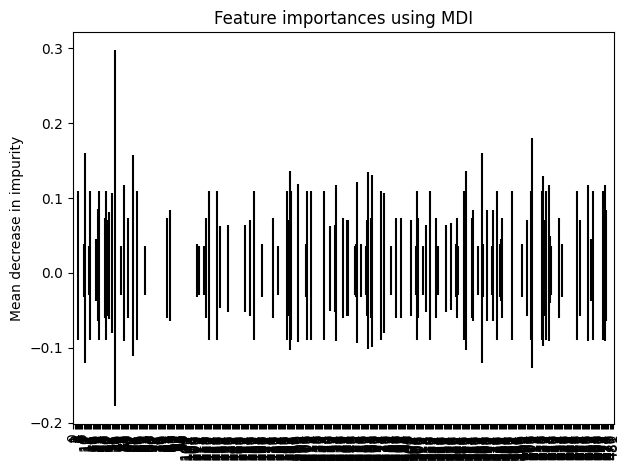

In [82]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
import pandas as pd

forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [83]:
result = permutation_importance(clf, features, y=[labels_dict[label] for label in labels], n_repeats=10, random_state=0)

In [84]:
print(result.importances_mean)
len(result.importances_mean)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

482

## GradientBoostingRegressor

In [59]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [60]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(features, y=[labels_dict[label] for label in labels])


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

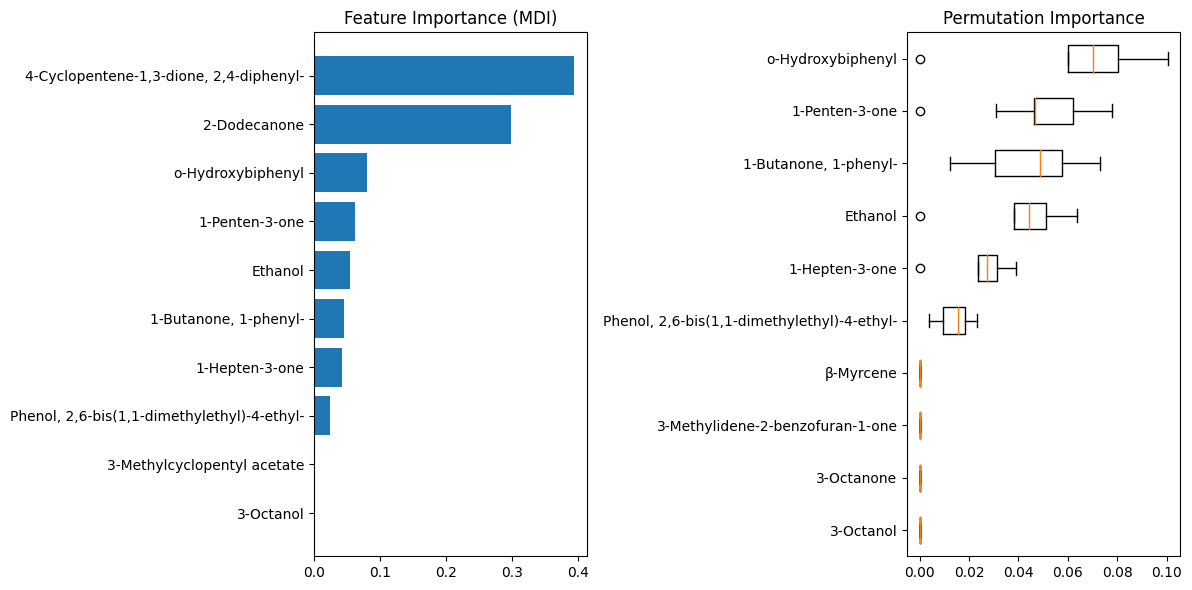

In [80]:
id_max = 10
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos[-10:], feature_importance[sorted_idx][-10:], align="center")
plt.yticks(pos[-10:], np.array(unique_mol_list)[sorted_idx][-10:])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg,features, y=[labels_dict[label] for label in labels], n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx][-10:].T,
    vert=False,
    labels=np.array(unique_mol_list)[sorted_idx][-10:],
)
plt.title("Permutation Importance")
fig.tight_layout()
plt.show()


## SHAP

In [87]:
shap.initjs()

In [88]:
explainer = shap.TreeExplainer(reg)

In [89]:
shap_values = explainer.shap_values(features)

In [96]:
i = 1
shap.force_plot(explainer.expected_value, shap_values[i], features=features[i], feature_names=unique_mol_list)

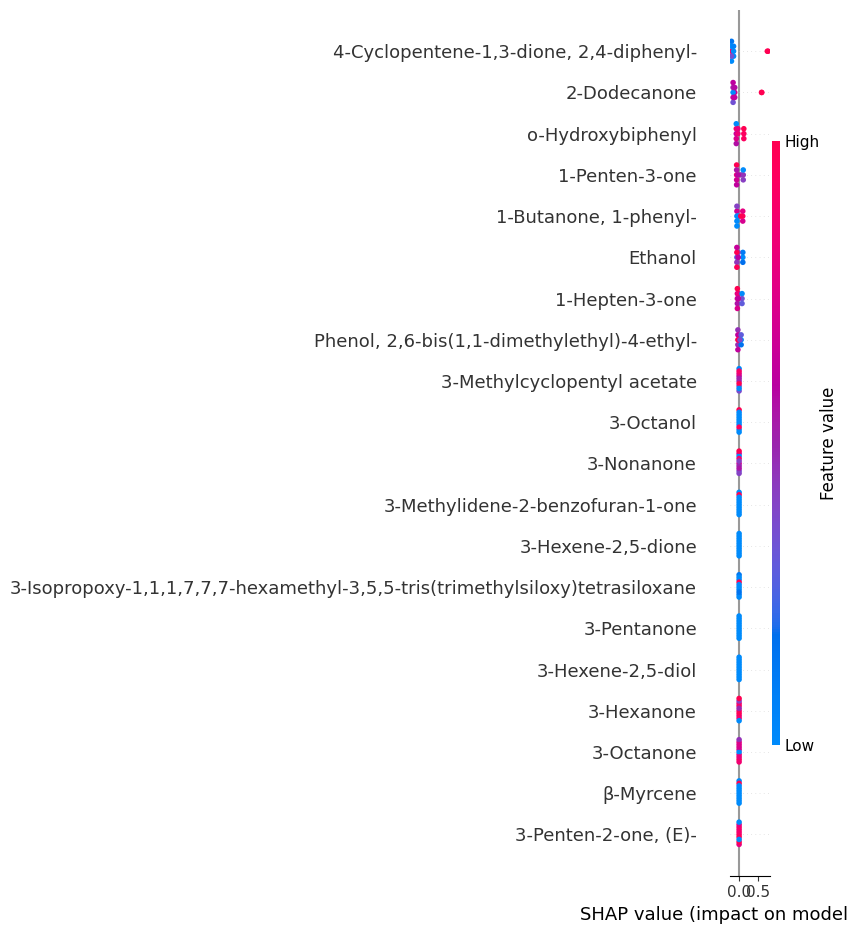

In [93]:
shap.summary_plot(shap_values, features=features, feature_names=unique_mol_list)